In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
data_new = pd.read_csv('/kaggle/input/santander-pr/train.csv', dtype={"ind_ahor_fin_ult1":"int8",'ind_aval_fin_ult1':"int8", 'ind_cco_fin_ult1':"int8", 
                                                                  'ind_cder_fin_ult1':"int8", 'ind_cno_fin_ult1':"int8", 'ind_ctju_fin_ult1':"int8", 'ind_ctma_fin_ult1':"int8", 
                                                                  'ind_ctop_fin_ult1':"int8", 'ind_ctpp_fin_ult1':"int8",
                                                                  'ind_nomina_ult1':"float16", 'ind_nom_pens_ult1':"float16",
                                                                  'ind_actividad_cliente':"float16", 'cod_prov':"float16",
                                                                  'tipodom':"float16", "indrel":"float16", "ind_nuevo":"float16",
                                                                  'ind_deco_fin_ult1':"int8", 'ind_deme_fin_ult1':"int8", 'ind_dela_fin_ult1':"int8",
                                                                  'ind_ecue_fin_ult1':"int8", 'ind_fond_fin_ult1':"int8", 'ind_hip_fin_ult1':"int8",
                                                                  'ind_plan_fin_ult1':"int8", 'ind_pres_fin_ult1':"int8", 'ind_reca_fin_ult1':"int8", 'ind_tjcr_fin_ult1':"int8", 
                                                                  'ind_valo_fin_ult1':"int8", 'ind_viv_fin_ult1':"int8", 'ind_recibo_ult1':"int8"},
                      parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'],)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_columns', 100)

For training purpose, we have 16 months of data starting from Jan 2015 upto April 2016



In [5]:
data_new.isnull().sum().sort_values(ascending = False)

conyuemp                 12714162
ult_fec_cli_1t           12692933
renta                     2565357
segmento                   182343
canal_entrada              179427
tiprel_1mes                145771
indrel_1mes                145771
nomprov                     89599
cod_prov                    89599
sexo                        27799
tipodom                     27735
indresi                     27734
ind_actividad_cliente       27734
indfall                     27734
indext                      27734
ind_empleado                27734
pais_residencia             27734
indrel                      27734
ind_nuevo                   27734
fecha_alta                  27734
ind_nomina_ult1             16063
ind_nom_pens_ult1           16063
ncodpers                        0
antiguedad                      0
age                             0
ind_recibo_ult1                 0
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_viv_fin_ult1                0
ind_valo_fin_u

27734, 16063 are very less in number. We could always delete them as they are meagre as compared to the number of records we have. Will try checking the accuracies in both the cases later on. For now, will replace the missing values.

The most people that are customers are youths.The age distribution is bimodal in nature i.e. there are 2 peaks one at the age interval 20-25 and other in the interval 40-50

In [6]:
data_new['age'] = pd.to_numeric(data_new['age'], errors='coerce') # errors = 'coerce' will convert the rows having 'NA' to NaN

In [7]:
mean_age = float(data_new['age'].mean())
mean_age = round(mean_age)
mean_age

40

In [8]:
data_new['age'].fillna(value = mean_age, inplace = True)

Text(0.5, 1.0, 'Age Distribution')

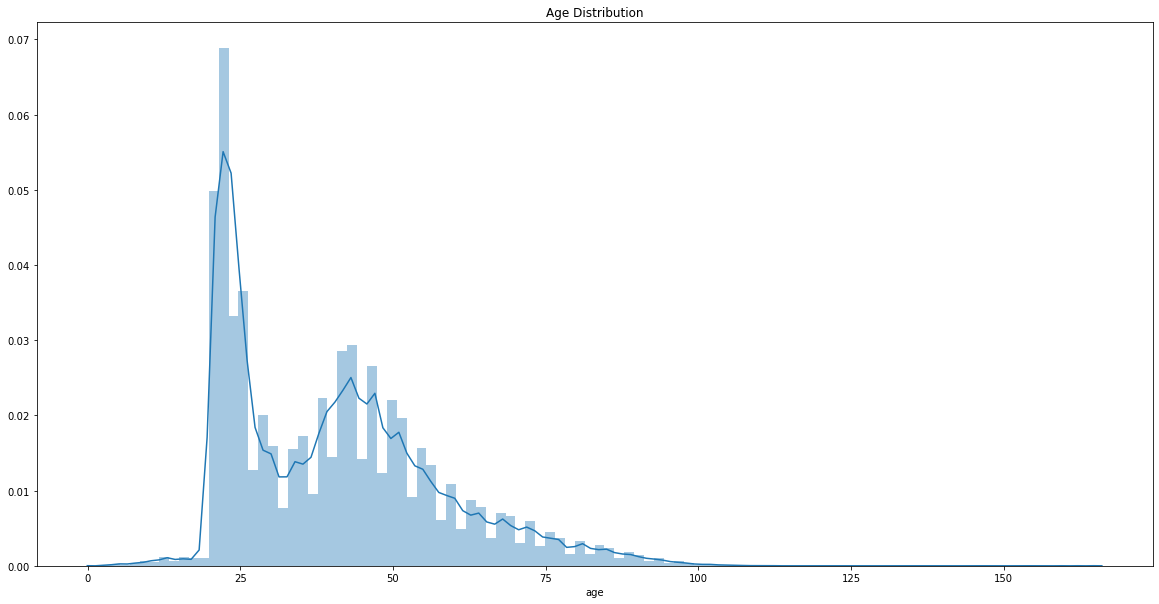

In [9]:
sb.distplot(data_new['age'], kde = True, bins = 100)
plt.title("Age Distribution")

In [10]:
data_new.shape

(12715856, 48)

In [11]:
data_new['ind_nuevo'].value_counts()

0.0    11911276
1.0      776846
Name: ind_nuevo, dtype: int64

The 'ind_nuevo' column indicates whether a customer is new or not.

0 indicates not a new customer

1 indicates a new customer.
Most of the customers aren't new
There are also NaN values. We need to replace the values with 1 or 0 depending on their relation with the bank.

Now for deciding what to fill the null values of ind_nuevo, let's check a few more columns like fecha_dato which gives when has the customer taken the contract, ind_actividad_cliente to check whether the customer is active or not

In [12]:
x = data_new[['fecha_dato', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'ind_actividad_cliente', 'indfall', 'ind_empleado']].loc[data_new['ind_nuevo'].isna()]
x

,fecha_dato,fecha_alta,ind_nuevo,antiguedad,ind_actividad_cliente,indfall,ind_empleado
261,2015-01-28,NaT,NaN,NA,NaN,NaN,NaN
1029,2015-01-28,NaT,NaN,NA,NaN,NaN,NaN
1063,2015-01-28,NaT,NaN,NA,NaN,NaN,NaN
1154,2015-01-28,NaT,NaN,NA,NaN,NaN,NaN
1779,2015-01-28,NaT,NaN,NA,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3775976,2015-06-28,NaT,NaN,NA,NaN,NaN,NaN
3776175,2015-06-28,NaT,NaN,NA,NaN,NaN,NaN
3776230,2015-06-28,NaT,NaN,NA,NaN,NaN,NaN
3776279,2015-06-28,NaT,NaN,NA,NaN,NaN,NaN


There are 27734 customers about whom we don't know yet whether they are new or old customers. We need to know for how many months they have been associated with the Bank.

Moreover, all of them have been inactive in the Bank. We also don't know whether they are deceased or not as the *indfall column is also containing null for these rows.

These customers only have ind_cco_fin_ult1 ie Current Accounts(mostly used for business) and ind_reca_fin_ult1 ie Taxes Account. But the ind_empleado column which indicates they are still employed or not is also null. So we can proceed to drop these rows.



In [13]:
data_new['ind_empleado'].value_counts()

N    12680044
B        3347
F        2371
A        2344
S          16
Name: ind_empleado, dtype: int64

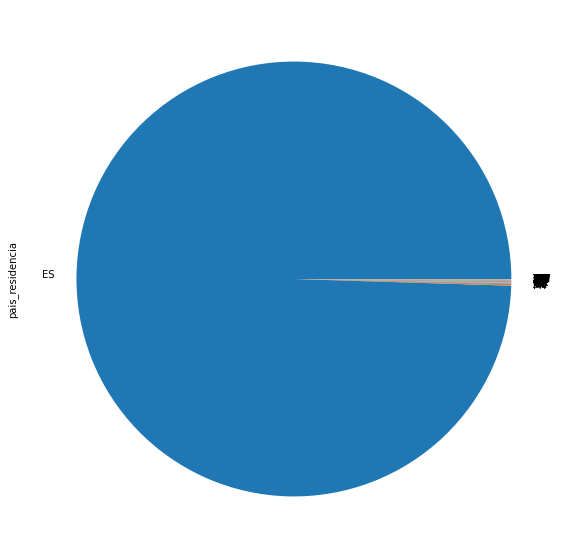

In [14]:
data_new['pais_residencia'].value_counts().plot(x=None, y=None, kind='pie')

'ES' is the most frequent residential area. Replacing all he missing values by 'ES'.

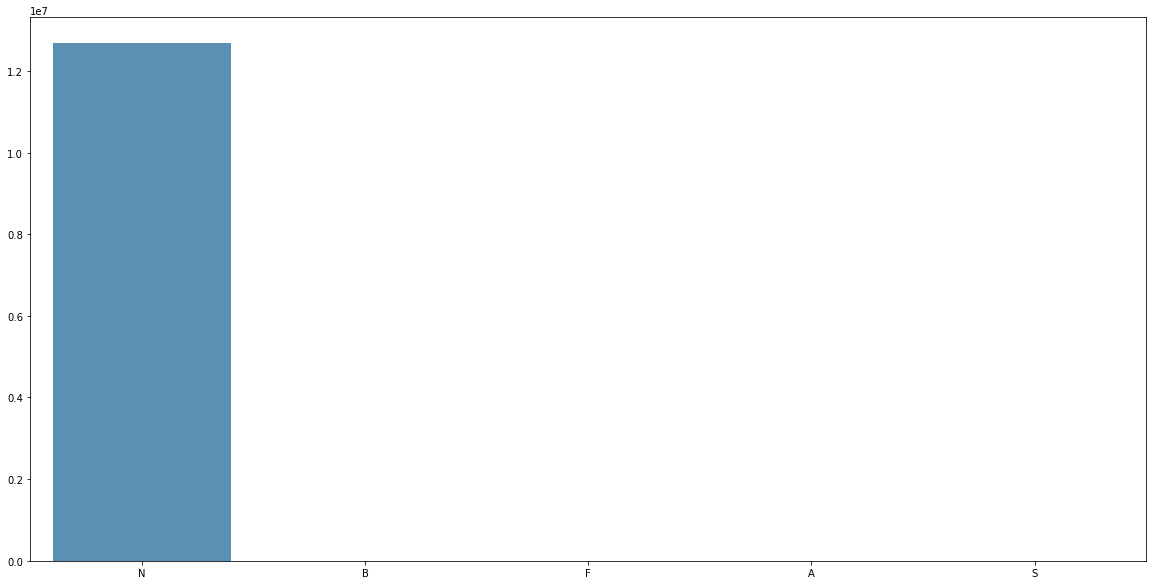

In [15]:
city_count  = data_new['ind_empleado'].value_counts()
city_count = city_count[:,]
sb.barplot(city_count.index, city_count.values, alpha=0.8)

#Employee index: A active, B ex employed, F filial, N not employee, P pasive
#most of the customers are not an employee of the bank

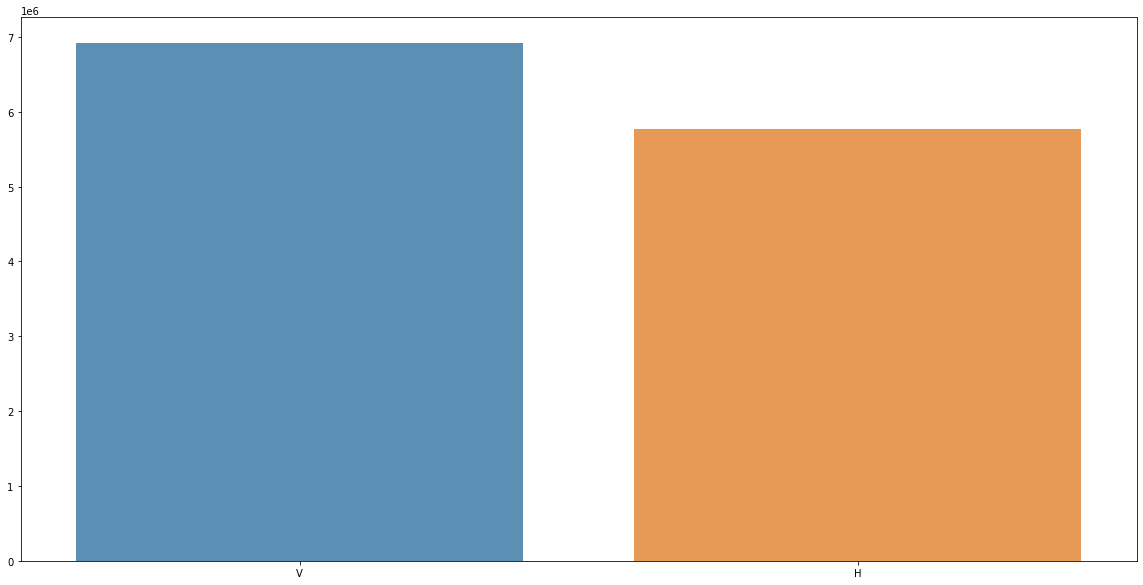

In [16]:
city_count = data_new['sexo'].value_counts()
city_count = city_count[:,]
sb.barplot(city_count.index, city_count.values, alpha=0.8)

In [17]:
data_new['fecha_dato_yearmonth'] = data_new['fecha_dato'].apply(lambda x: (100 * x.year) + x.month)

In [18]:
month_year_value_counts = data_new['fecha_dato_yearmonth'].value_counts()

From the barplot, we can observe that till June 2015, there were almost constant number of customers ranging upto 6lac, but from July 2017, there is a sudden surge in the number of customers

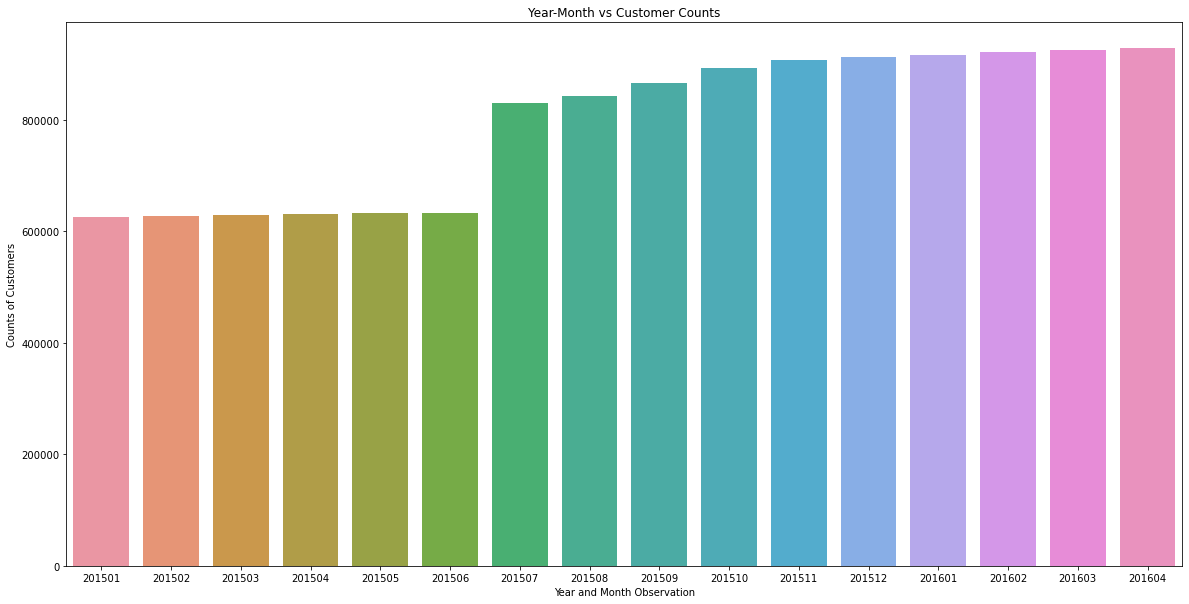

In [19]:
sb.barplot(data = data_new, x = month_year_value_counts.index , y = month_year_value_counts.values)
plt.xlabel('Year and Month Observation')
plt.ylabel('Counts of Customers')
plt.title('Year-Month vs Customer Counts')
plt.show()

In [20]:
data_new[data_new['fecha_alta'].isna()].head(20)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_dato_yearmonth
261,2015-01-28,1050741,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1029,2015-01-28,1051017,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1063,2015-01-28,1051064,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1154,2015-01-28,1051387,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1779,2015-01-28,1048660,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1850,2015-01-28,1049775,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,201501
1867,2015-01-28,1049774,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1886,2015-01-28,1049838,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1922,2015-01-28,1049700,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,201501
2142,2015-01-28,1049406,NaN,NaN,NaN,40.0,NaT,NaN,NA,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501


We could have replaced the fecha_alta missing values using antiguedad(seniority), last purchase date(ult_fec_cli_1t), ind_nuevo(New customer Index). So we can now drop all those values as there doesn't seem a way to replace them justly.

In [21]:
data_new['fecha_alta'].isnull().sum()

27734

In [22]:
data_new.dropna(subset=['fecha_alta'], inplace=True)

In [23]:
data_new.isnull().sum().sort_values(ascending = False)

conyuemp                 12686428
ult_fec_cli_1t           12665199
renta                     2537623
segmento                   154609
canal_entrada              151693
tiprel_1mes                118037
indrel_1mes                118037
nomprov                     61865
cod_prov                    61865
ind_nomina_ult1               217
ind_nom_pens_ult1             217
sexo                           65
tipodom                         1
indext                          0
ind_actividad_cliente           0
indfall                         0
ncodpers                        0
indresi                         0
ind_empleado                    0
indrel                          0
antiguedad                      0
ind_nuevo                       0
fecha_alta                      0
age                             0
pais_residencia                 0
fecha_dato_yearmonth            0
ind_ahor_fin_ult1               0
ind_recibo_ult1                 0
ind_aval_fin_ult1               0
ind_viv_fin_ul

'indrel_1mes', 'tiprel_1mes' almost denote same things. We can derive 'ult_fec_cli_1t' using the mentioned ones. If they are null, we can't generate 'ult_fec_cli_1t'. Hence, it would be wise to delete the null values of 'indrel_1mes' as there would be no way to decide their values.




In [24]:
data_new[data_new['indrel_1mes'].isna()].head(20)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_dato_yearmonth
3781457,2015-07-28,631189,N,ES,V,42.0,2015-07-13,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,MADRID,0.0,105597.36,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3865981,2015-07-28,565364,N,ES,H,48.0,2015-07-24,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,8.0,BARCELONA,1.0,118791.66,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3975350,2015-07-28,838985,N,ES,V,49.0,2015-07-22,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,7.0,"BALEARS, ILLES",0.0,172654.95,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3977056,2015-07-28,843591,N,ES,V,40.0,2015-05-30,1.0,2,1.0,NaT,NaN,NaN,S,S,NaN,KHM,N,1.0,28.0,MADRID,1.0,113016.54,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3979448,2015-07-28,828469,N,ES,H,48.0,2015-07-31,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,7.0,"BALEARS, ILLES",0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3989267,2015-07-28,806362,N,ES,V,42.0,2015-07-17,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,MADRID,0.0,149256.93,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
3999491,2015-07-28,825657,N,ES,V,39.0,2015-07-21,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,46.0,VALENCIA,1.0,66144.30,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
4250377,2015-07-28,1113092,N,ES,V,8.0,2015-07-21,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,47.0,VALLADOLID,1.0,288731.25,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
4563431,2015-07-28,1381558,N,ES,V,20.0,2015-07-09,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,31.0,NAVARRA,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507
4582807,2015-07-28,1417144,N,ES,V,43.0,2015-07-26,1.0,0,1.0,NaT,NaN,NaN,S,N,NaN,NaN,N,1.0,8.0,BARCELONA,0.0,90138.60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201507


In [25]:
data_new[data_new['indrel_1mes'].notnull()].head(20)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_dato_yearmonth
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,NaT,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35,1.0,NaT,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
5,2015-01-28,1050615,N,ES,H,23.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
6,2015-01-28,1050616,N,ES,H,23.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
7,2015-01-28,1050617,N,ES,H,23.0,2012-08-10,0.0,35,1.0,NaT,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
8,2015-01-28,1050619,N,ES,H,24.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501
9,2015-01-28,1050620,N,ES,H,23.0,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,201501


In [26]:
del x

In [27]:
data_new.dropna(subset=['indrel_1mes'], inplace=True)

codprov and nomprov contain same information. One out of them can be dropped. 


In [28]:
groupbyNom = data_new.groupby('nomprov')

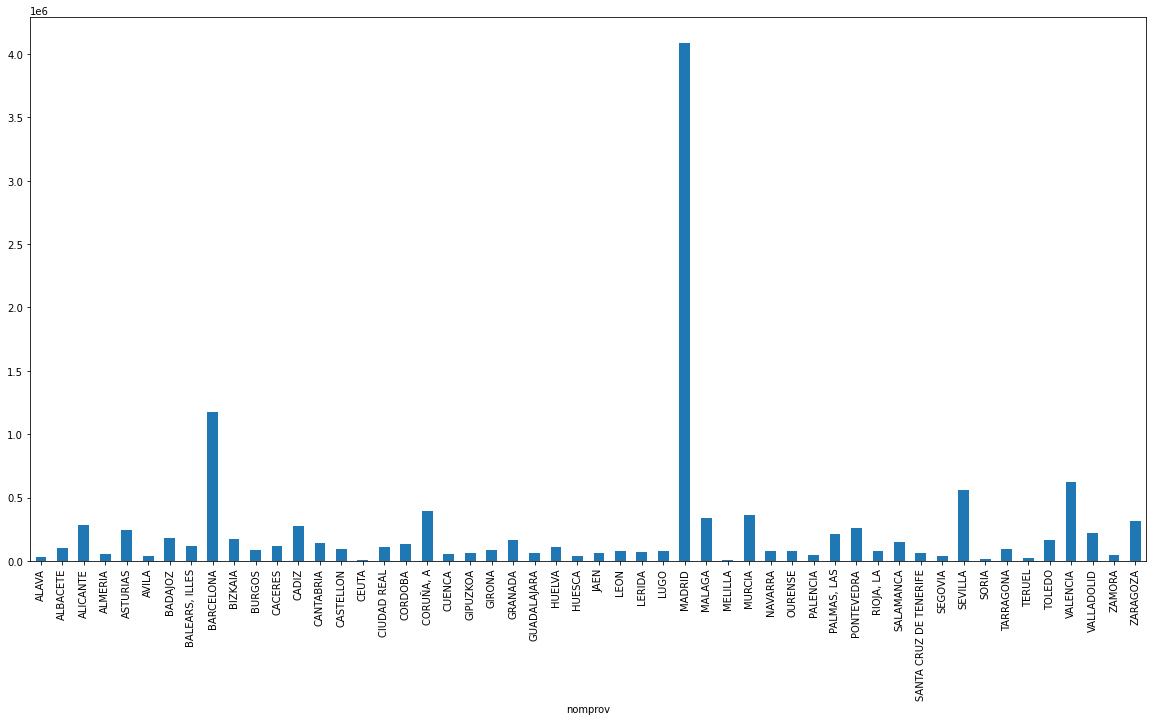

In [29]:
data_new.groupby(['nomprov']).size().plot(kind = "bar") 

It can be seen that most of the people belong to "Madrid, ES". So it'll be fair to replace missing ones with this as there is massive difference between the number of residents of Madrid and other places. 

In [30]:
data_new.loc[data_new["nomprov"].isnull(), "nomprov"] = "MADRID"

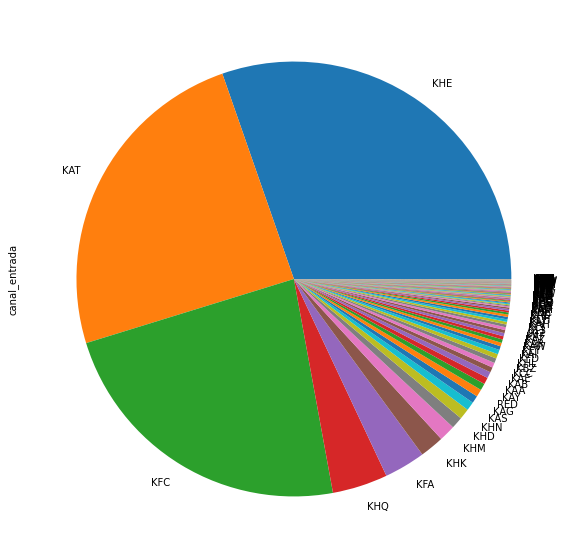

In [31]:
data_new['canal_entrada'].value_counts().plot(kind = 'pie')

KHE, KFC, KAT are the channels through which most of the customers have joined the bank.

In [32]:
lists = ['KHE', 'KFC', 'KAT']

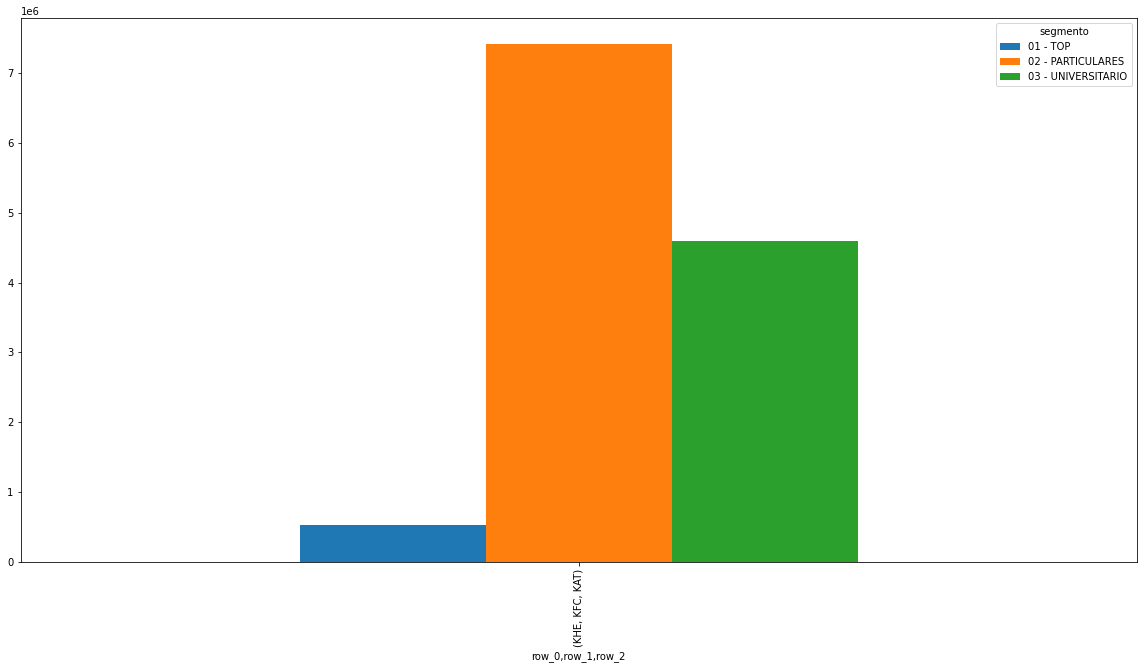

In [33]:
pd.crosstab(lists,data_new['segmento']).plot.bar()

In [34]:
Y = data_new[['segmento',  'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']].loc[data_new['segmento']=='01 - TOP']

In [35]:
Y.drop(columns='segmento',inplace=True)

In [36]:
Y.sum()

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


ind_ahor_fin_ult1       110.0
ind_aval_fin_ult1       122.0
ind_cco_fin_ult1     321498.0
ind_cder_fin_ult1       980.0
ind_cno_fin_ult1     163337.0
ind_ctju_fin_ult1       117.0
ind_ctma_fin_ult1     14024.0
ind_ctop_fin_ult1    133112.0
ind_ctpp_fin_ult1     80901.0
ind_deco_fin_ult1      7917.0
ind_deme_fin_ult1      7191.0
ind_dela_fin_ult1    261854.0
ind_ecue_fin_ult1    243677.0
ind_fond_fin_ult1    101246.0
ind_hip_fin_ult1      10978.0
ind_plan_fin_ult1     38620.0
ind_pres_fin_ult1      1251.0
ind_reca_fin_ult1    104540.0
ind_tjcr_fin_ult1    108636.0
ind_valo_fin_ult1    107066.0
ind_viv_fin_ult1       6169.0
ind_nomina_ult1           inf
ind_nom_pens_ult1         inf
ind_recibo_ult1      202059.0
dtype: float64

In [37]:
del Y

In [38]:
Z=data_new[['segmento',  'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',\
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',\
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',\
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',\
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',\
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',\
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',\
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']].loc[data_new['segmento']=='02 - PARTICULARES']

In [39]:
Z.drop(columns='segmento',inplace=True)
Z.sum()

ind_ahor_fin_ult1       1208.0
ind_aval_fin_ult1        178.0
ind_cco_fin_ult1     4154529.0
ind_cder_fin_ult1       4033.0
ind_cno_fin_ult1      709361.0
ind_ctju_fin_ult1     120830.0
ind_ctma_fin_ult1     100446.0
ind_ctop_fin_ult1    1498866.0
ind_ctpp_fin_ult1     464731.0
ind_deco_fin_ult1      14240.0
ind_deme_fin_ult1      14018.0
ind_dela_fin_ult1     280842.0
ind_ecue_fin_ult1     735991.0
ind_fond_fin_ult1     129849.0
ind_hip_fin_ult1       63629.0
ind_plan_fin_ult1      77398.0
ind_pres_fin_ult1      30947.0
ind_reca_fin_ult1     519161.0
ind_tjcr_fin_ult1     434856.0
ind_valo_fin_ult1     211299.0
ind_viv_fin_ult1       42922.0
ind_nomina_ult1            inf
ind_nom_pens_ult1          inf
ind_recibo_ult1      1195903.0
dtype: float64

In [40]:
del Z

In [41]:
W=data_new[['segmento',  'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',\
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',\
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',\
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',\
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',\
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',\
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',\
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']].loc[data_new['segmento']=='03 - UNIVERSITARIO']
W.drop(columns='segmento',inplace=True)
W.sum()

ind_ahor_fin_ult1          0.0
ind_aval_fin_ult1          0.0
ind_cco_fin_ult1     3824842.0
ind_cder_fin_ult1         41.0
ind_cno_fin_ult1      156651.0
ind_ctju_fin_ult1         80.0
ind_ctma_fin_ult1       7692.0
ind_ctop_fin_ult1      26797.0
ind_ctpp_fin_ult1      11742.0
ind_deco_fin_ult1        637.0
ind_deme_fin_ult1        433.0
ind_dela_fin_ult1      11807.0
ind_ecue_fin_ult1      72402.0
ind_fond_fin_ult1       6360.0
ind_hip_fin_ult1         988.0
ind_plan_fin_ult1       1699.0
ind_pres_fin_ult1        332.0
ind_reca_fin_ult1      37401.0
ind_tjcr_fin_ult1      27212.0
ind_valo_fin_ult1       9498.0
ind_viv_fin_ult1         434.0
ind_nomina_ult1            inf
ind_nom_pens_ult1          inf
ind_recibo_ult1       233007.0
dtype: float64

In [42]:
del W

#ind_cco_fin_ult1 , ind_recibo_ult1 , ind_cno_fin_ult1 
#out of all different categories of customers, majority of customers in each category have a current account
#VIPs having long term deposits, e-accounts, direct debit, Payroll account
#Individuals have particular account, e-account,payroll account, taxes
#University grads having payroll account, direct debit

In [43]:
data_new['nomprov'].value_counts()

MADRID                    4146034
BARCELONA                 1175178
VALENCIA                   625353
SEVILLA                    559922
CORUÑA, A                  396159
MURCIA                     363760
MALAGA                     340147
ZARAGOZA                   316638
ALICANTE                   287108
CADIZ                      272337
PONTEVEDRA                 257770
ASTURIAS                   244557
VALLADOLID                 220311
PALMAS, LAS                216258
BADAJOZ                    178199
BIZKAIA                    172594
TOLEDO                     168299
GRANADA                    164500
SALAMANCA                  151450
CANTABRIA                  143154
CORDOBA                    133332
CACERES                    120230
BALEARS, ILLES             113925
HUELVA                     113429
CIUDAD REAL                110075
ALBACETE                   104938
CASTELLON                   95970
TARRAGONA                   90424
BURGOS                      89556
GIRONA        

In [44]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12570085 entries, 0 to 12715855
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   fecha_dato             datetime64[ns]
 1   ncodpers               int64         
 2   ind_empleado           object        
 3   pais_residencia        object        
 4   sexo                   object        
 5   age                    float64       
 6   fecha_alta             datetime64[ns]
 7   ind_nuevo              float16       
 8   antiguedad             object        
 9   indrel                 float16       
 10  ult_fec_cli_1t         datetime64[ns]
 11  indrel_1mes            object        
 12  tiprel_1mes            object        
 13  indresi                object        
 14  indext                 object        
 15  conyuemp               object        
 16  canal_entrada          object        
 17  indfall                object        
 18  tipodom             

In [47]:
renta_vs_nom = data_new[['age', 'renta', 'cod_prov', 'nomprov', 'segmento']][data_new['renta'].notnull()]
renta_vs_nom

,age,renta,cod_prov,nomprov,segmento
0,35.0,87218.10,29.0,MALAGA,02 - PARTICULARES
1,23.0,35548.74,13.0,CIUDAD REAL,03 - UNIVERSITARIO
2,23.0,122179.11,13.0,CIUDAD REAL,03 - UNIVERSITARIO
3,22.0,119775.54,50.0,ZARAGOZA,03 - UNIVERSITARIO
5,23.0,22220.04,45.0,TOLEDO,03 - UNIVERSITARIO
...,...,...,...,...,...
12715851,47.0,43093.74,46.0,VALENCIA,02 - PARTICULARES
12715852,41.0,17628.00,45.0,TOLEDO,02 - PARTICULARES
12715853,34.0,43727.70,14.0,CORDOBA,02 - PARTICULARES
12715854,44.0,134106.45,8.0,BARCELONA,02 - PARTICULARES


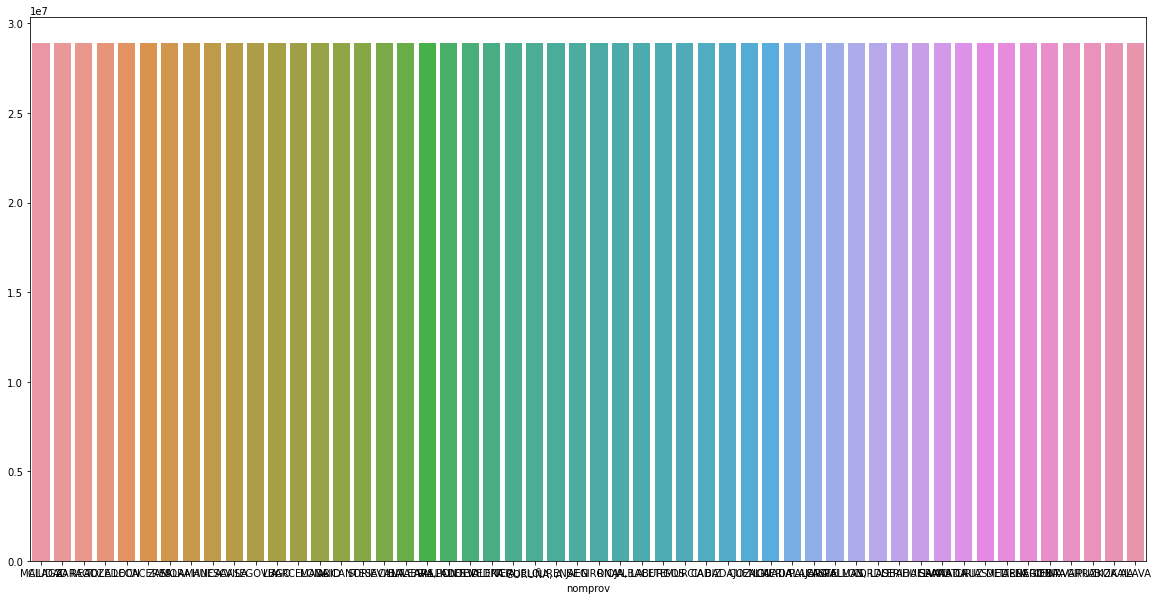

In [48]:
sb.barplot(x = 'nomprov', y = renta_vs_nom['renta'].max(), data = renta_vs_nom)

# ***Feature Selection Process***

In [49]:
data_new = pd.read_csv('/kaggle/input/santander-pr/train.csv', 
        usecols = ['fecha_dato', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
                   'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                   'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
                   'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                   'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
                   'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                   'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
                   'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],                       
        dtype={"ind_ahor_fin_ult1":"int8",'ind_aval_fin_ult1':"int8", 'ind_cco_fin_ult1':"int8", 
               'ind_cder_fin_ult1':"int8", 'ind_cno_fin_ult1':"int8", 'ind_ctju_fin_ult1':"int8", 'ind_ctma_fin_ult1':"int8", 
               'ind_ctop_fin_ult1':"int8", 'ind_ctpp_fin_ult1':"int8",
               'ind_nomina_ult1':"float16", 'ind_nom_pens_ult1':"float16",
               'ind_deco_fin_ult1':"int8", 'ind_deme_fin_ult1':"int8", 'ind_dela_fin_ult1':"int8",
               'ind_ecue_fin_ult1':"int8", 'ind_fond_fin_ult1':"int8", 'ind_hip_fin_ult1':"int8",
               'ind_plan_fin_ult1':"int8", 'ind_pres_fin_ult1':"int8", 'ind_reca_fin_ult1':"int8", 'ind_tjcr_fin_ult1':"int8", 
               'ind_valo_fin_ult1':"int8", 'ind_viv_fin_ult1':"int8", 'ind_recibo_ult1':"int8"},
        parse_dates=['fecha_dato']
    )

In [50]:
data_new['Year_Month'] = data_new['fecha_dato'].apply(lambda x: (100 * x.year) + x.month)

In [51]:
data_new = data_new.groupby(['Year_Month'], as_index = False).sum()

In [52]:
data_new.set_index('Year_Month', inplace = True)

In [53]:
final_y = data_new.iloc[:, 0:]

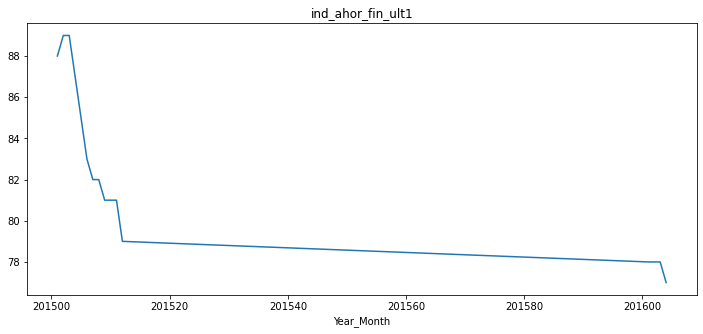

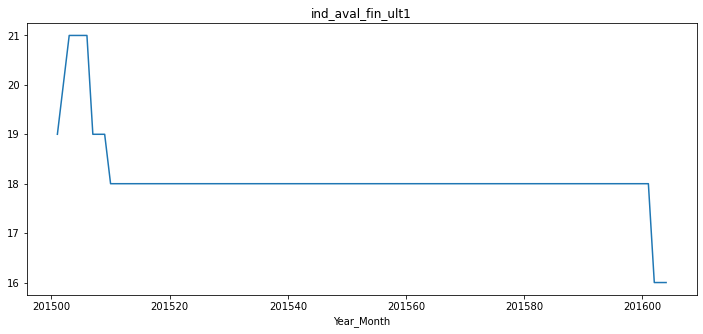

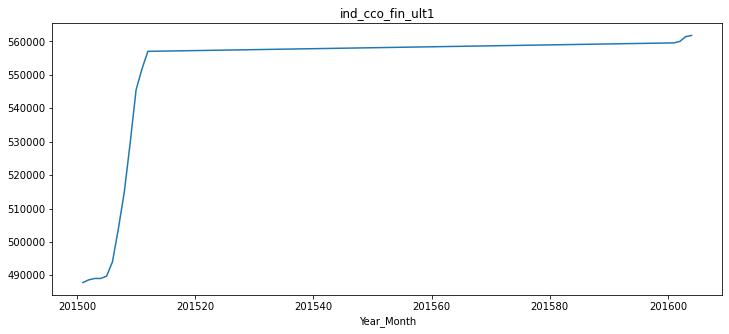

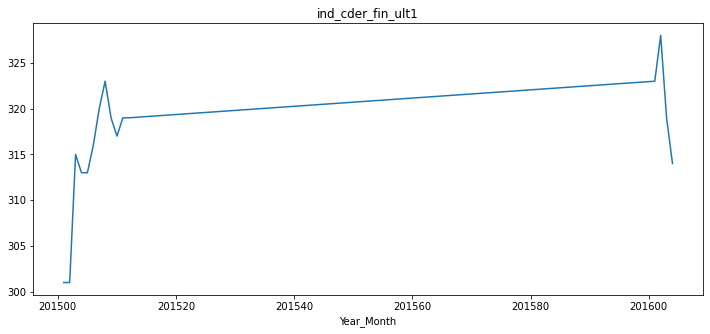

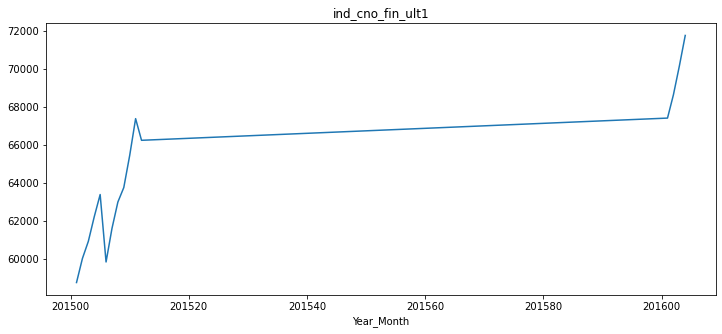

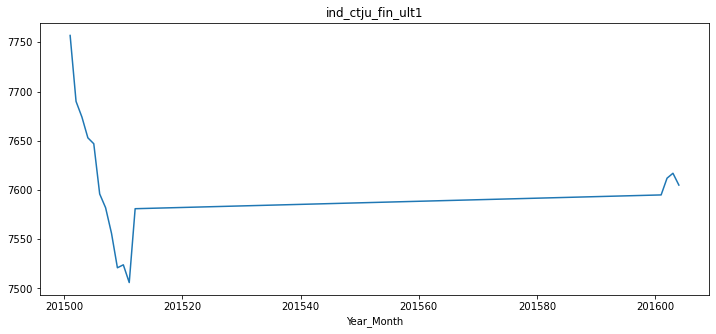

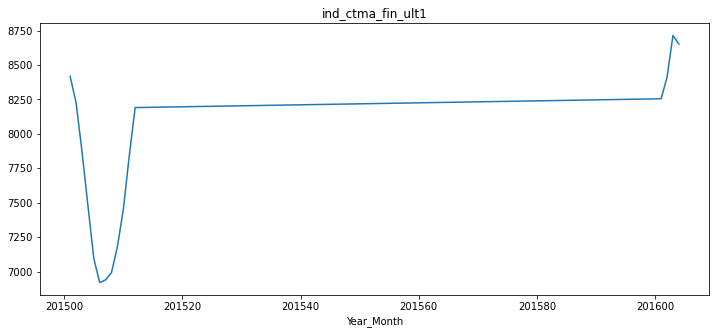

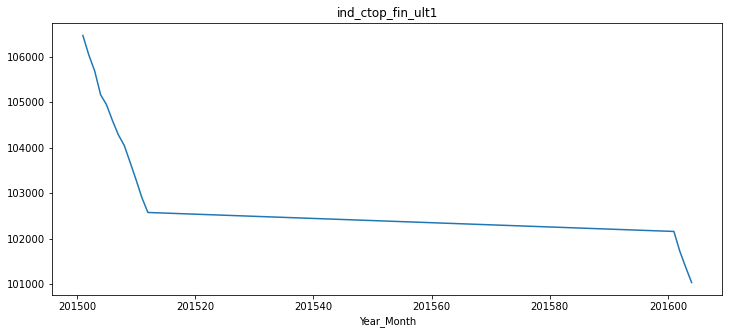

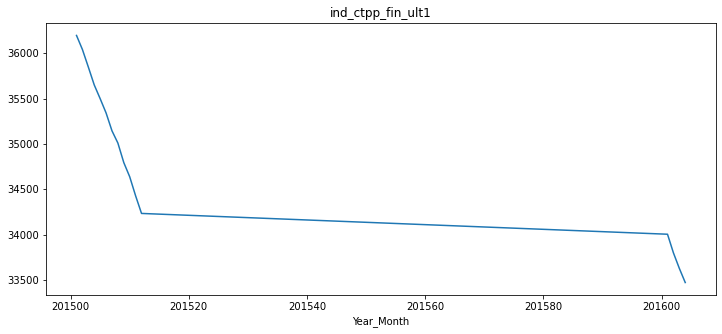

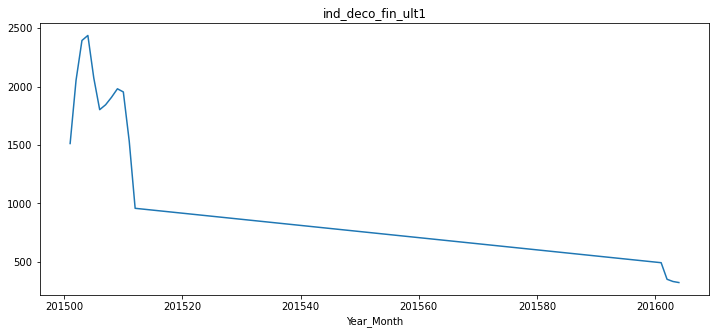

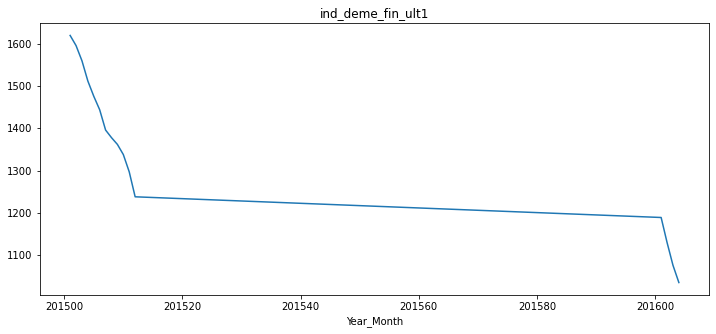

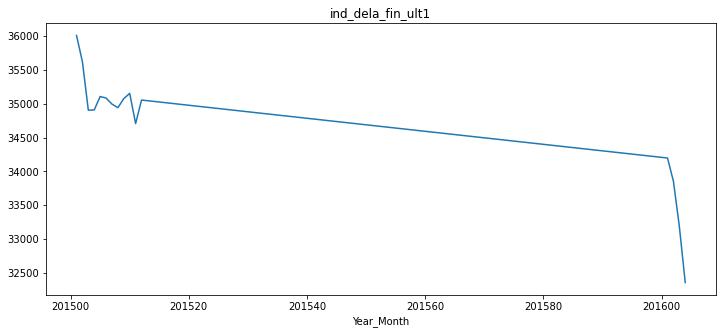

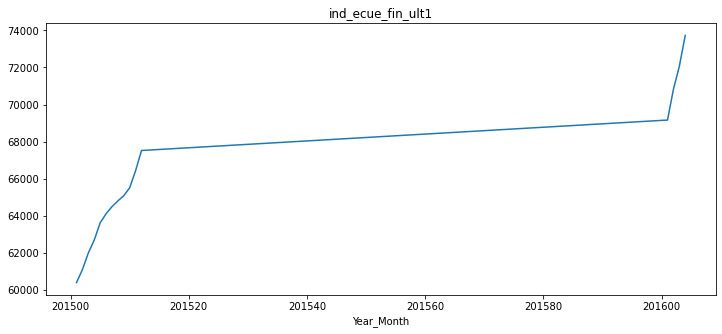

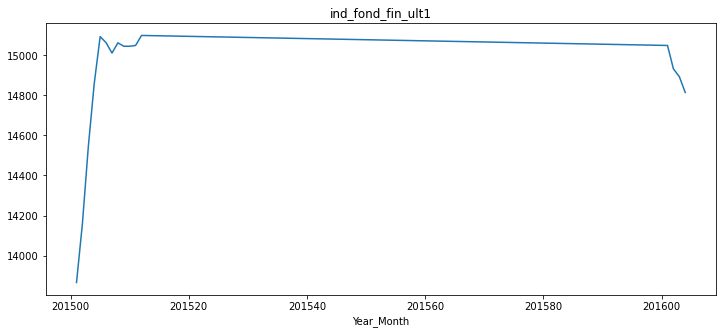

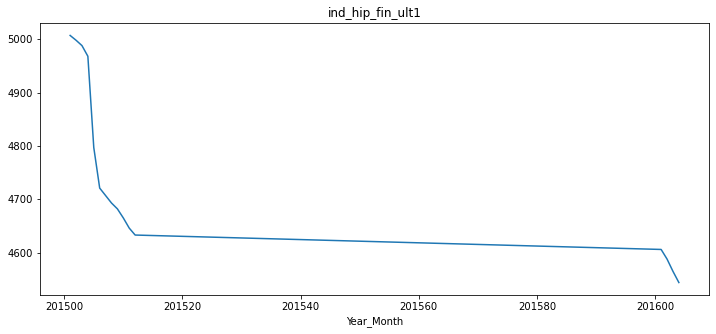

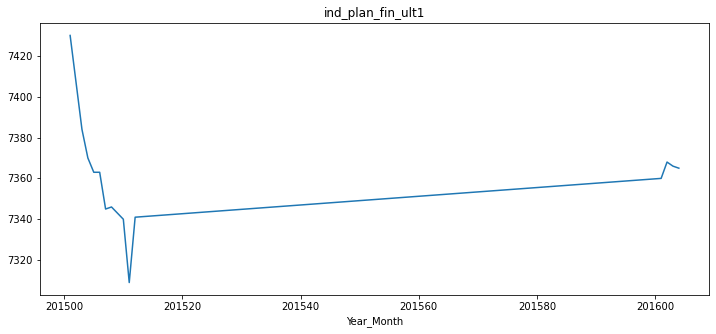

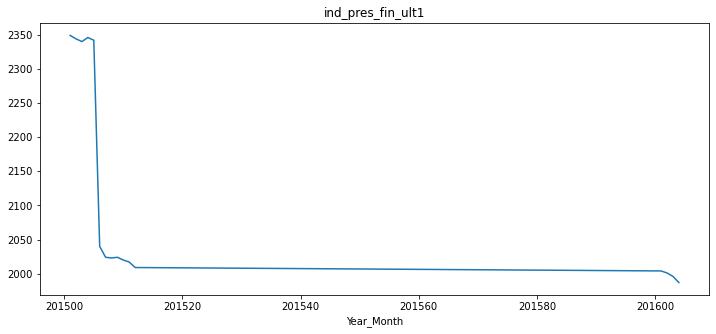

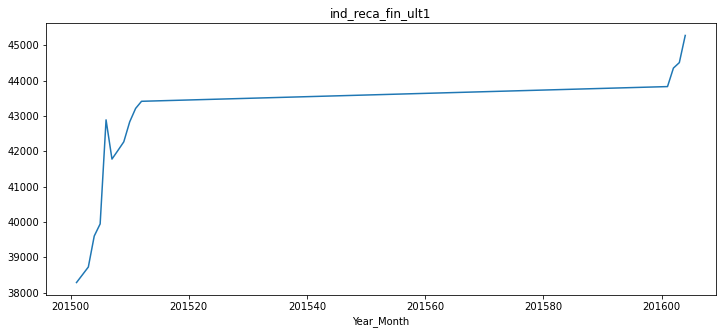

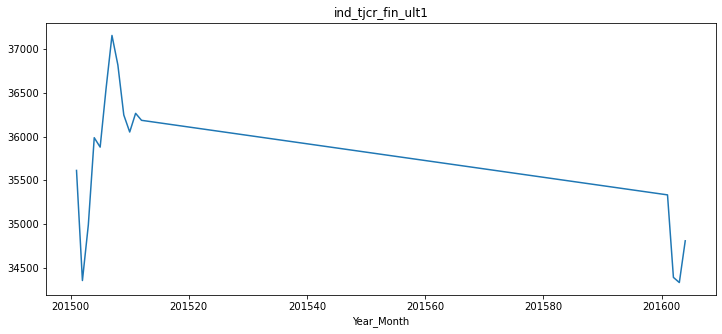

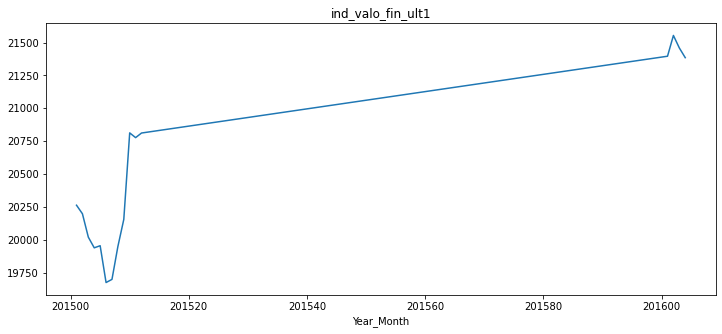

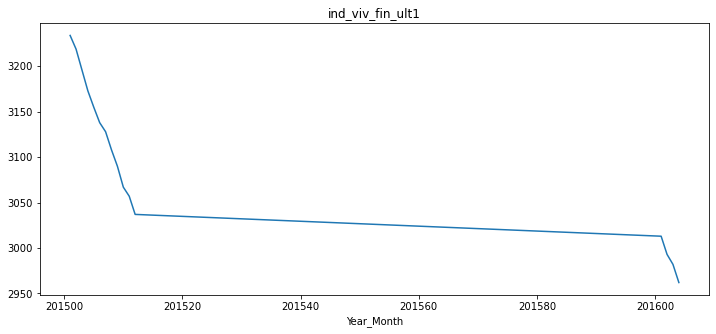

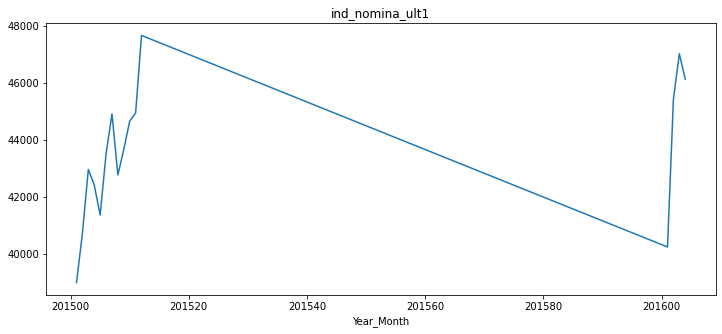

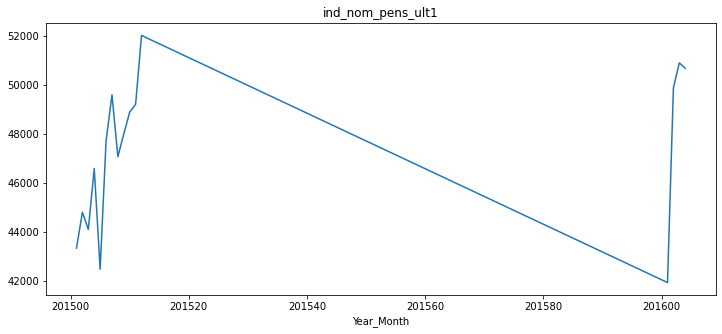

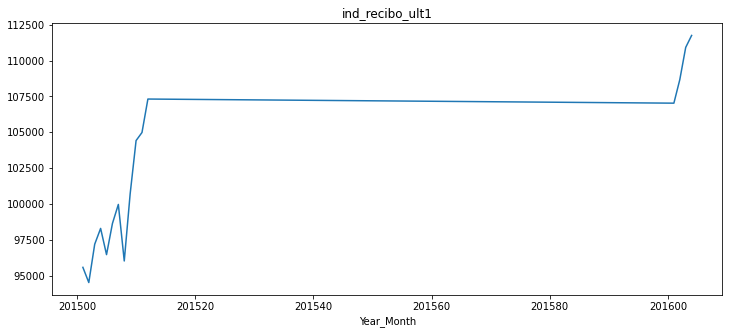

In [54]:
for col in final_y.columns:
    data_new[col].plot(figsize=(12,5))
    plt.title(col)
    plt.show()

Dropped products ind_ahor_fin_ult1 and ind_aval_fin_ult1 as the number of customers choosing these products had a downward trend and it seemed that it's no more supported by Santander Bank.

In [56]:
final_y

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,
201501,88.0,19.0,487855.0,301.0,58763.0,7757.0,8418.0,106471.0,36195.0,1513.0,1620.0,36010.0,60381.0,13865.0,5007.0,7430.0,2349.0,38288.0,35613.0,20263.0,3234.0,39008.0,43328.0,95601.0
201502,89.0,20.0,488658.0,301.0,60028.0,7690.0,8228.0,106043.0,36040.0,2055.0,1596.0,35621.0,61080.0,14160.0,4998.0,7407.0,2344.0,38507.0,34352.0,20198.0,3219.0,40736.0,44800.0,94543.0
201503,89.0,21.0,489074.0,315.0,60929.0,7674.0,7875.0,105688.0,35847.0,2396.0,1560.0,34905.0,61979.0,14545.0,4988.0,7384.0,2340.0,38727.0,34990.0,20020.0,3196.0,42976.0,44096.0,97211.0
201504,87.0,21.0,489069.0,313.0,62221.0,7653.0,7482.0,105167.0,35650.0,2439.0,1512.0,34909.0,62677.0,14860.0,4968.0,7370.0,2346.0,39603.0,35988.0,19939.0,3173.0,42432.0,46592.0,98312.0
201505,85.0,21.0,489737.0,313.0,63391.0,7647.0,7096.0,104947.0,35499.0,2075.0,1476.0,35107.0,63604.0,15094.0,4797.0,7363.0,2342.0,39946.0,35880.0,19955.0,3155.0,41376.0,42464.0,96487.0
201506,83.0,21.0,494027.0,316.0,59845.0,7596.0,6920.0,104602.0,35342.0,1803.0,1444.0,35085.0,64096.0,15064.0,4721.0,7363.0,2040.0,42888.0,36550.0,19675.0,3138.0,43520.0,47712.0,98655.0
201507,82.0,19.0,503903.0,320.0,61607.0,7582.0,6939.0,104288.0,35145.0,1845.0,1396.0,34995.0,64479.0,15012.0,4707.0,7345.0,2024.0,41779.0,37159.0,19699.0,3128.0,44928.0,49600.0,99981.0
201508,82.0,19.0,514827.0,323.0,62997.0,7556.0,6993.0,104053.0,35010.0,1909.0,1378.0,34942.0,64793.0,15063.0,4693.0,7346.0,2023.0,42021.0,36820.0,19949.0,3108.0,42784.0,47072.0,96045.0
201509,81.0,19.0,529608.0,319.0,63759.0,7521.0,7180.0,103680.0,34795.0,1982.0,1362.0,35076.0,65071.0,15046.0,4682.0,7343.0,2024.0,42267.0,36248.0,20155.0,3090.0,43680.0,48000.0,100726.0


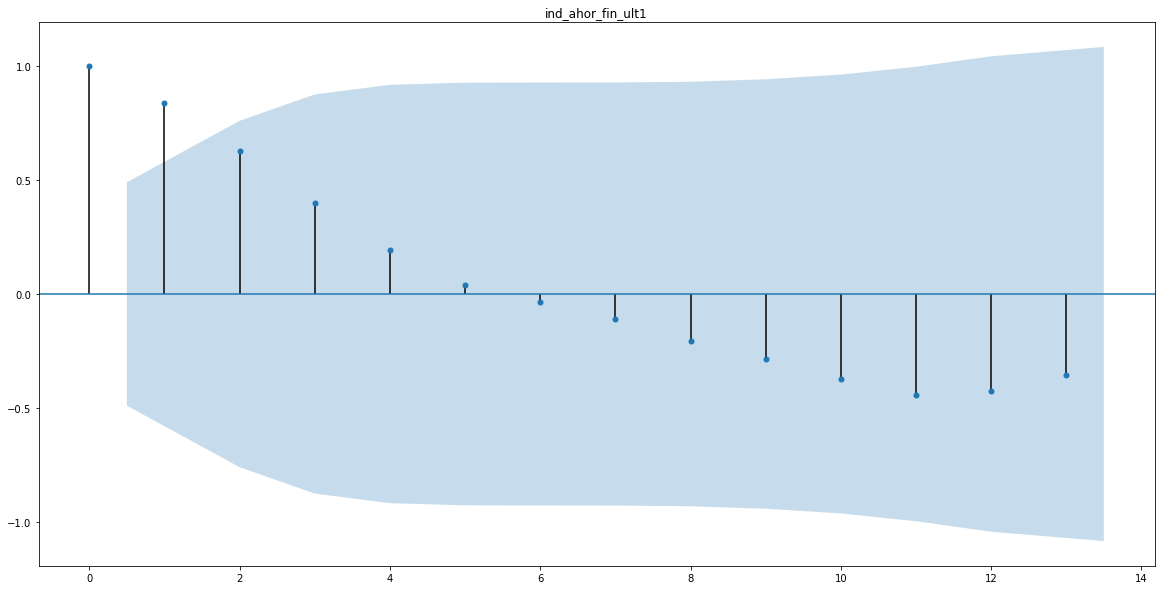

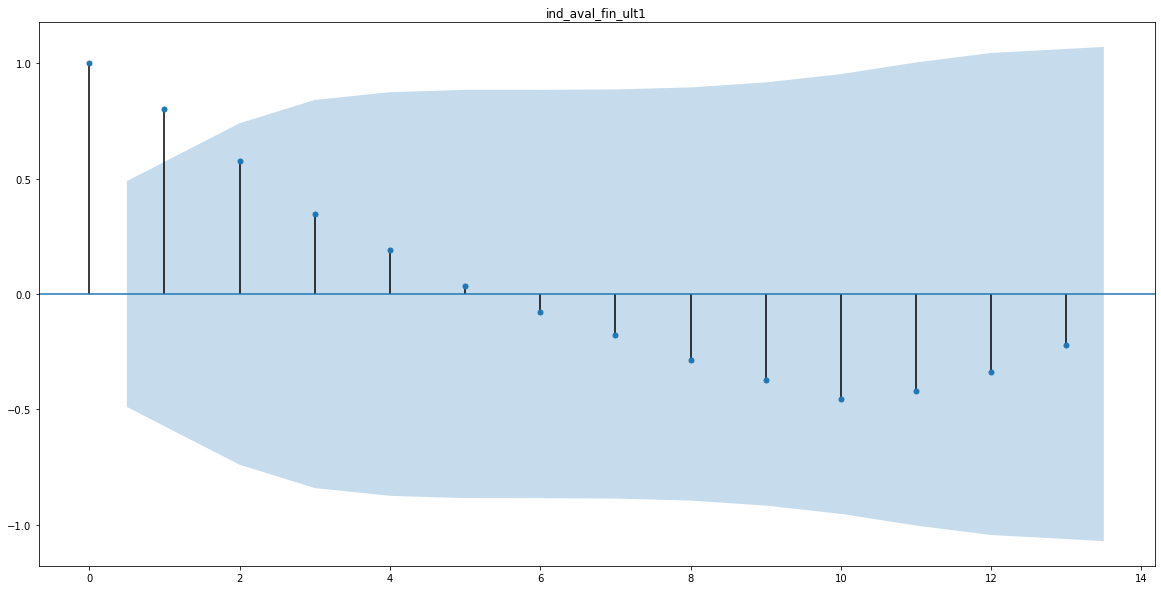

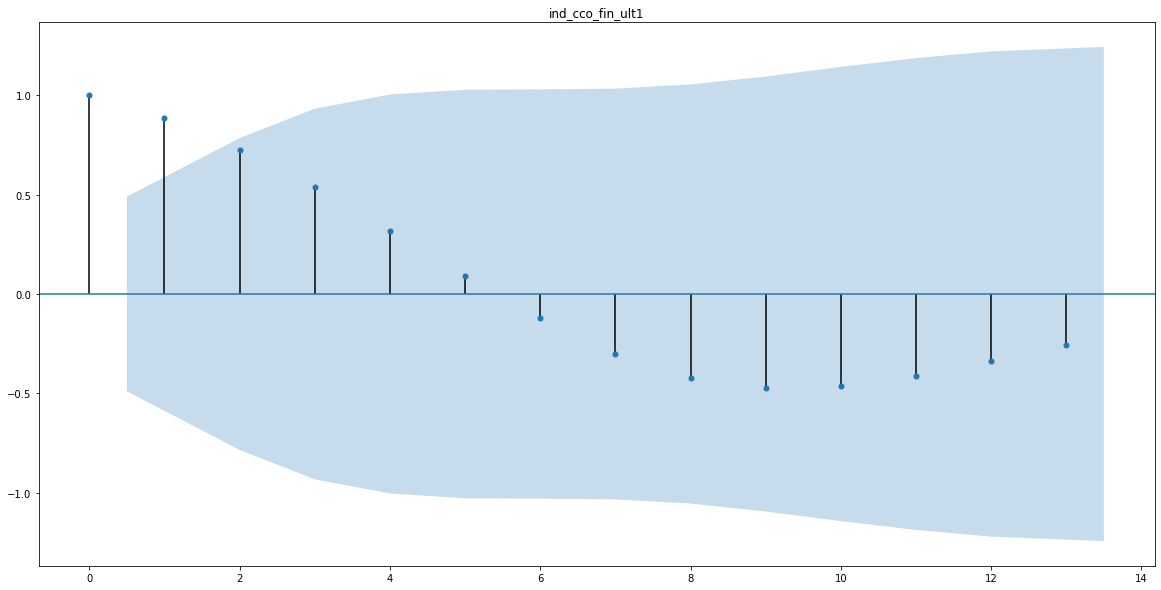

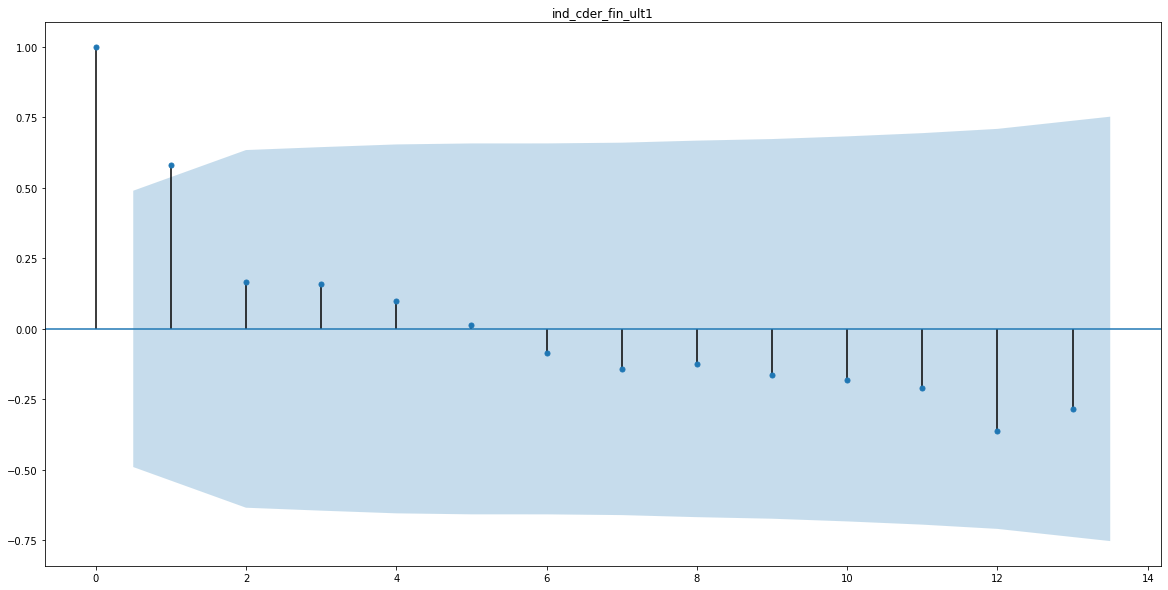

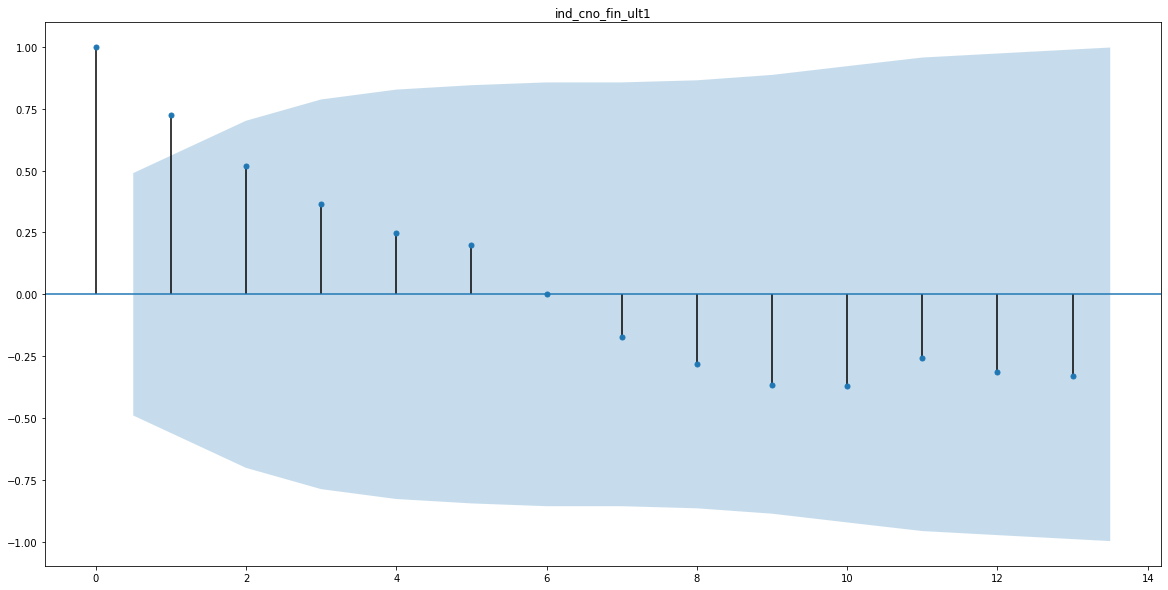

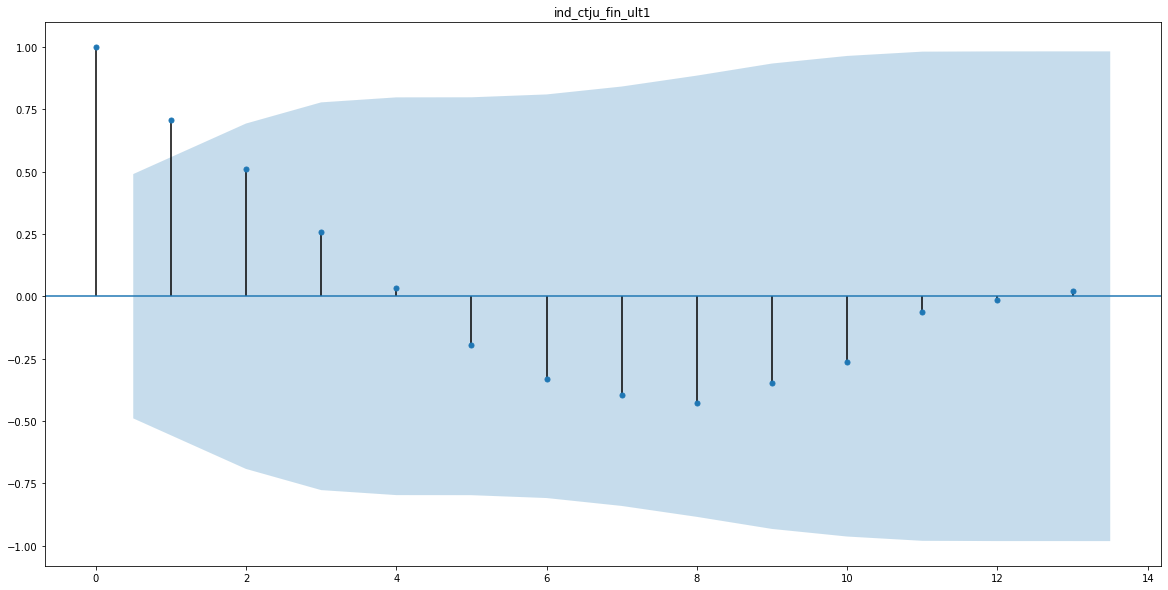

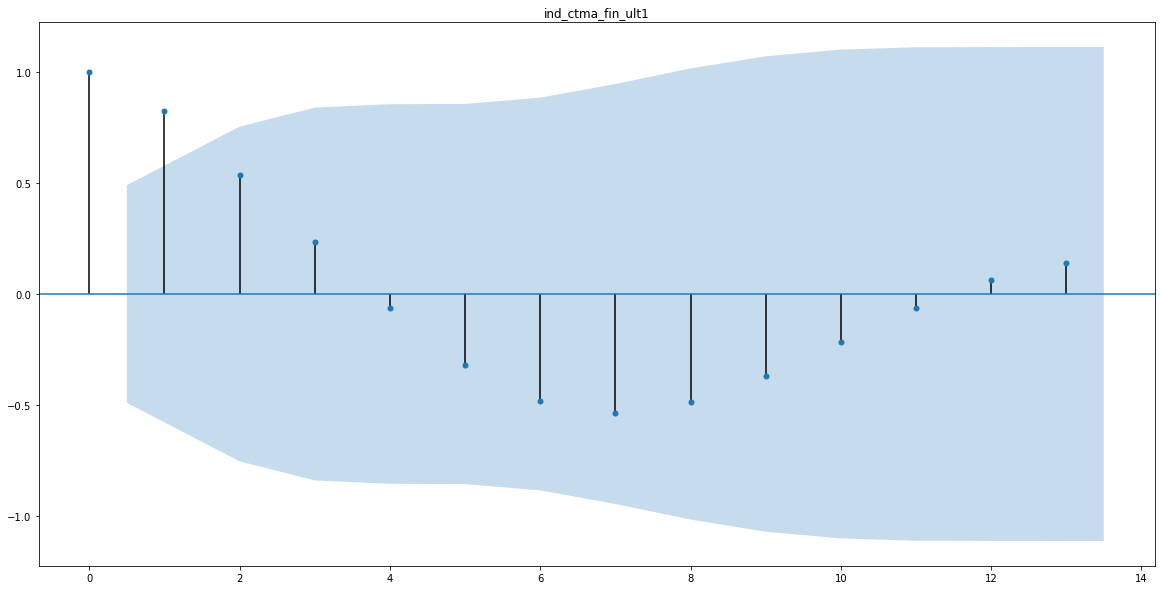

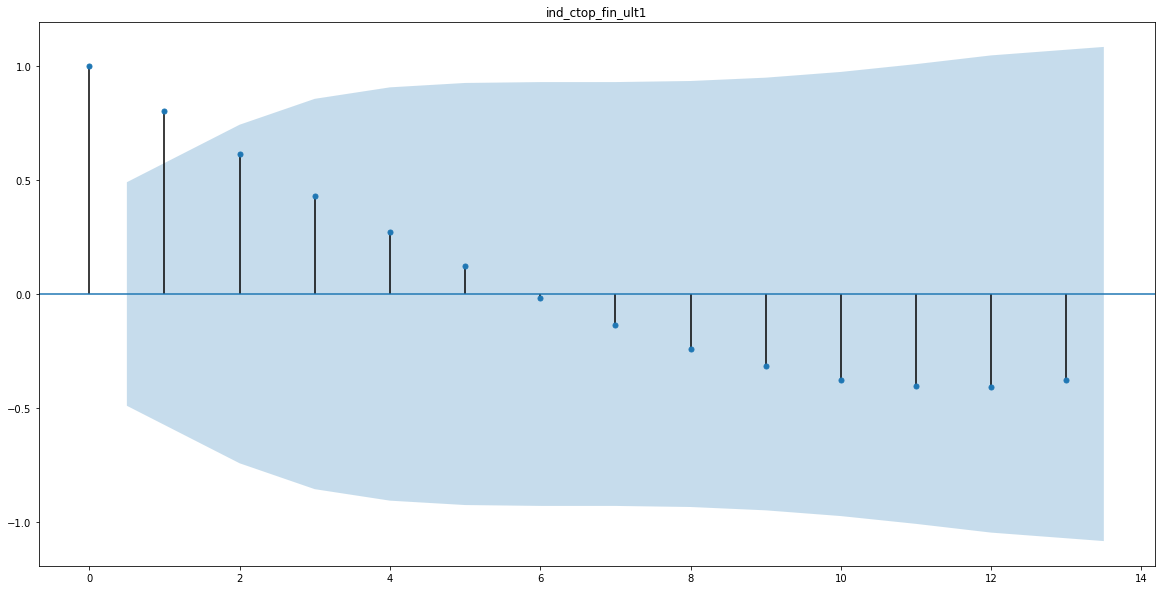

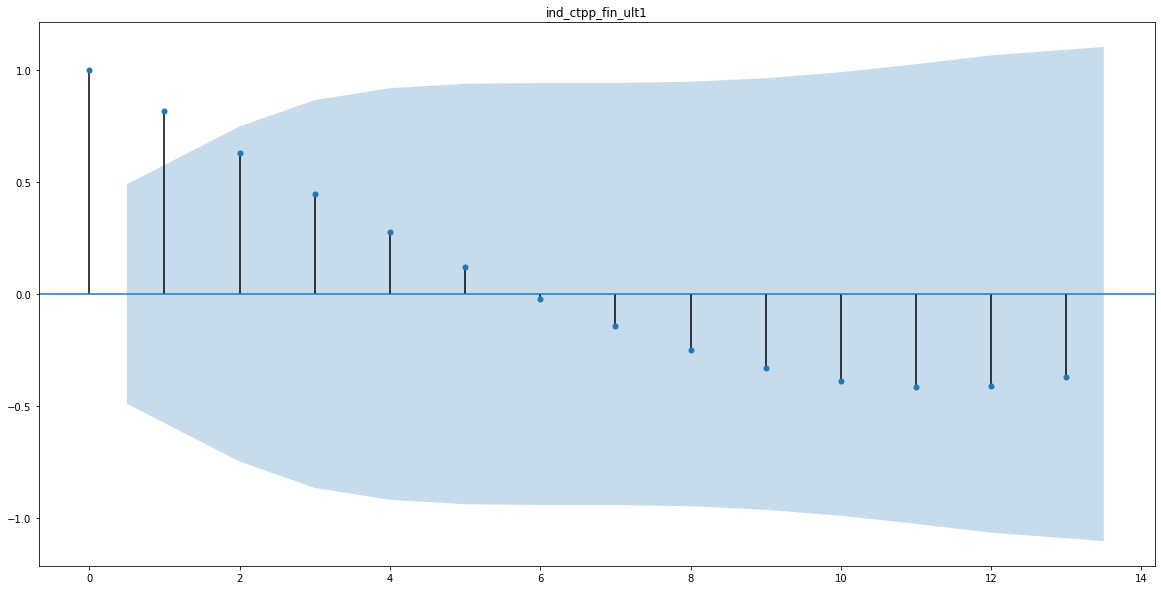

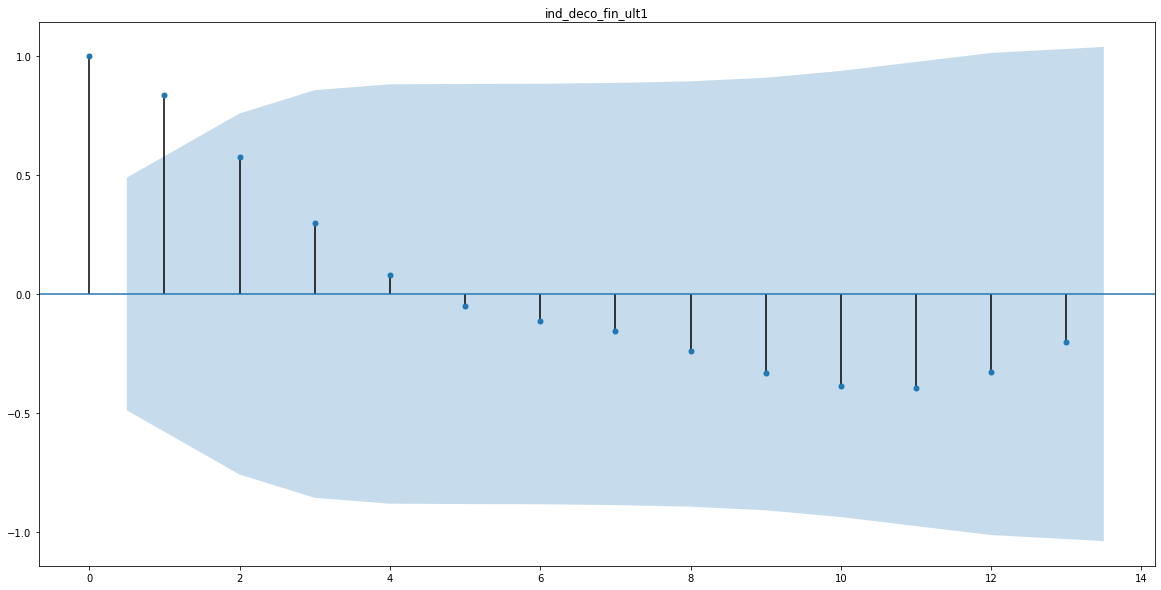

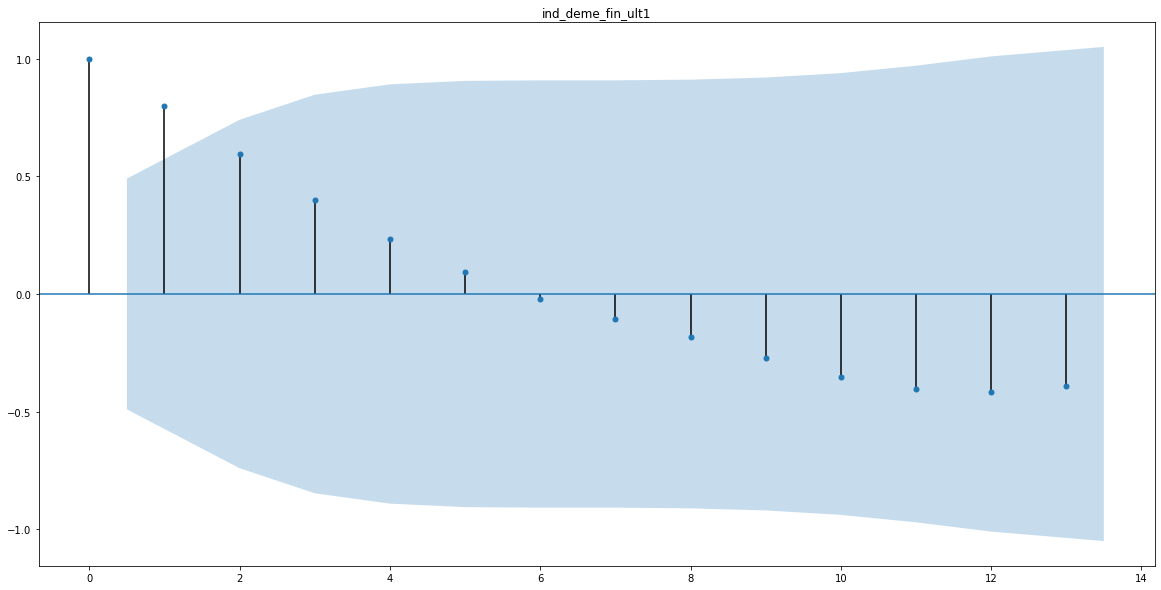

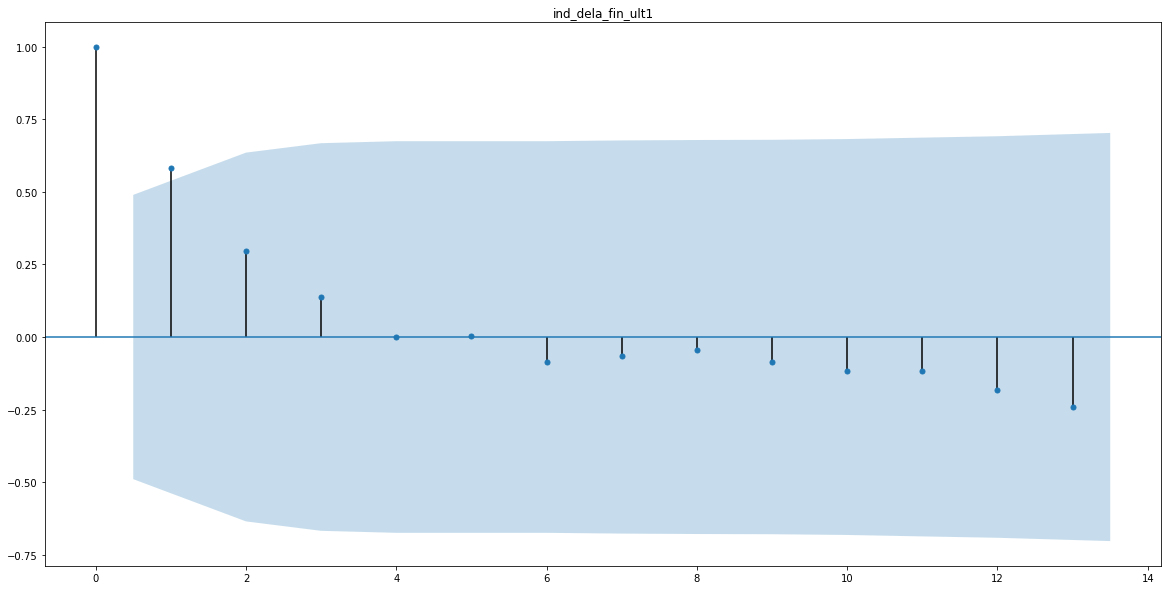

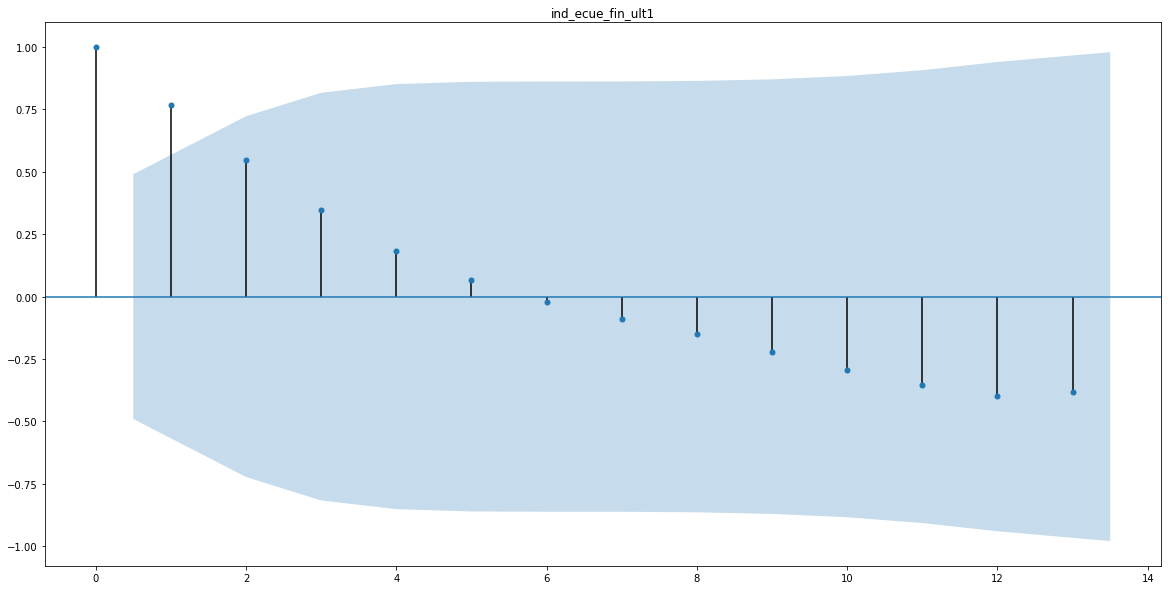

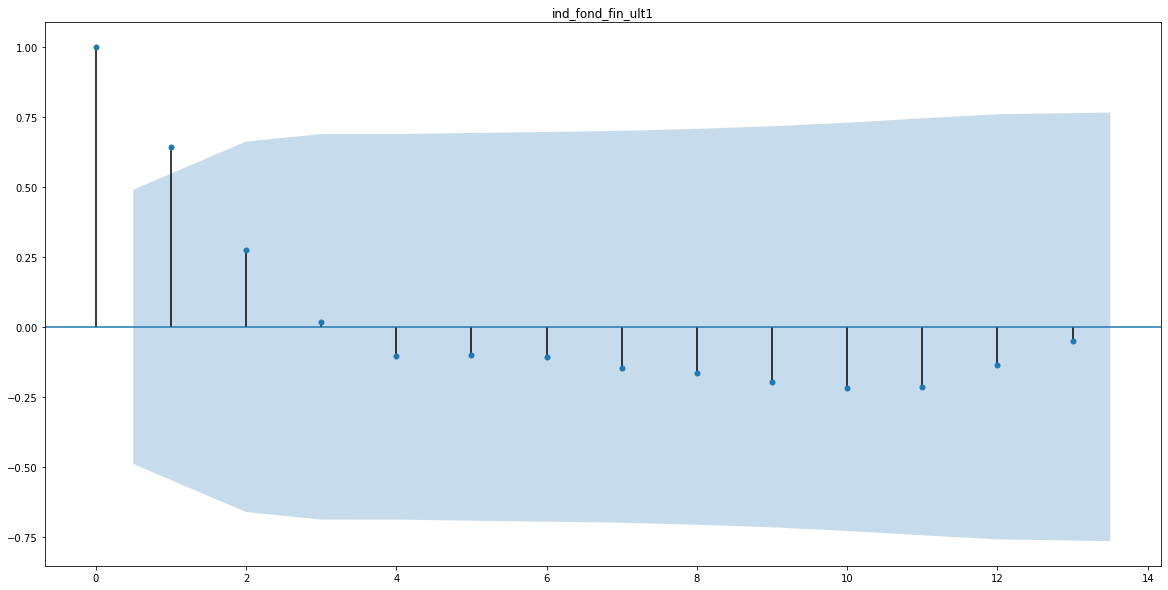

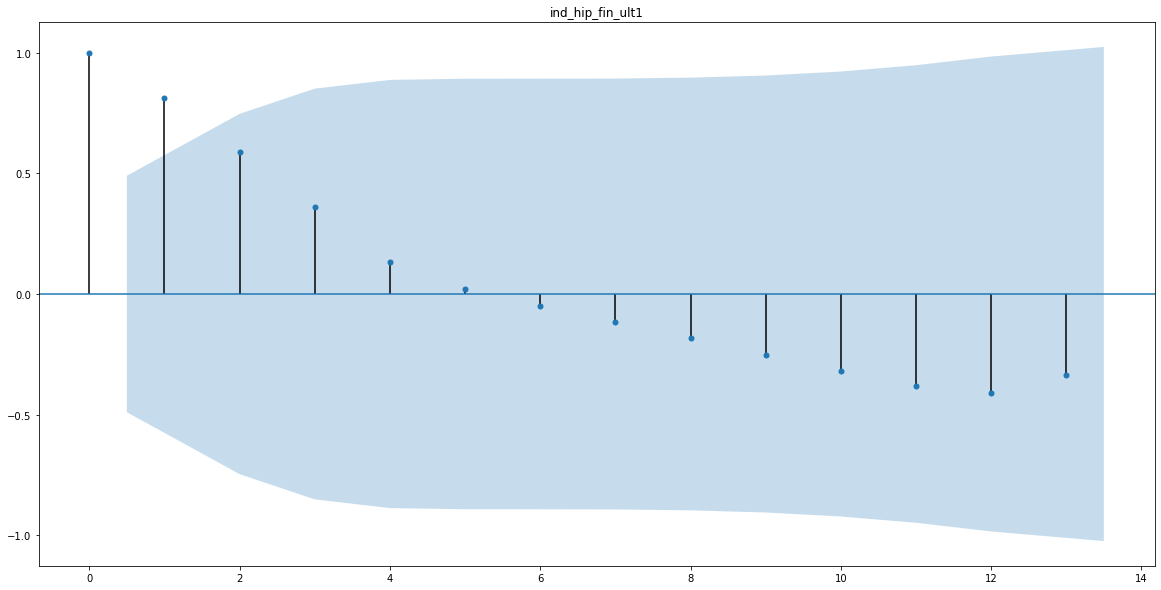

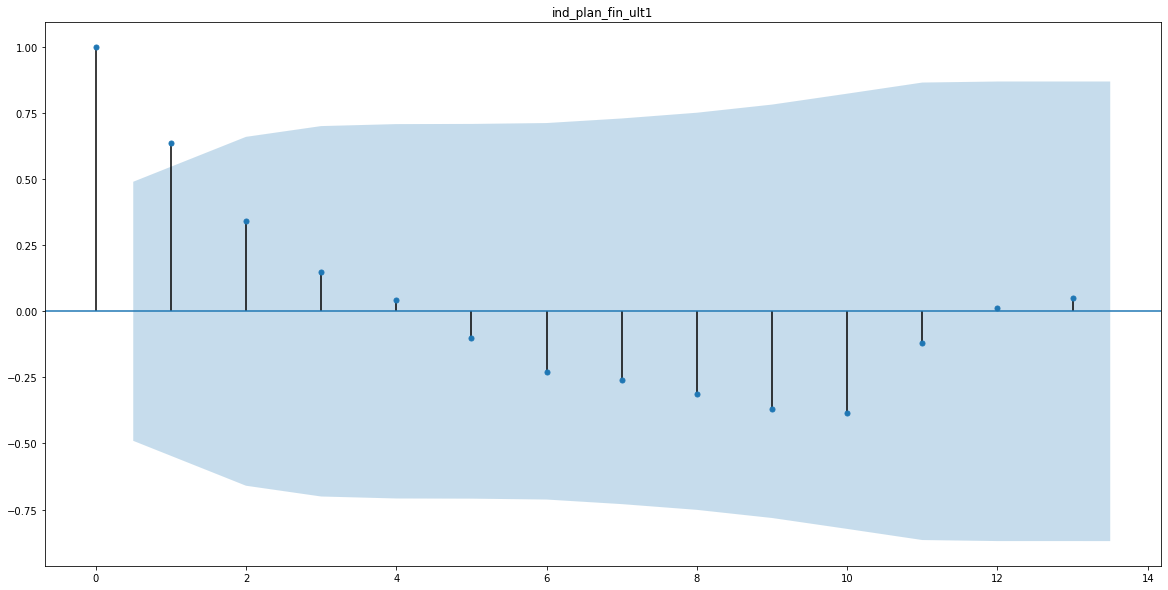

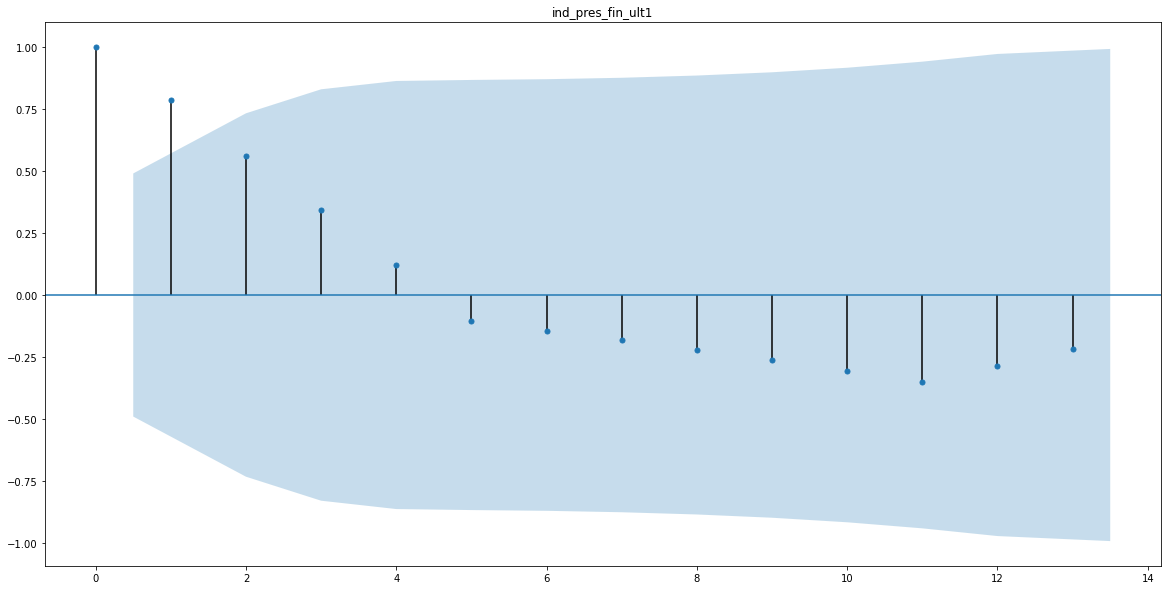

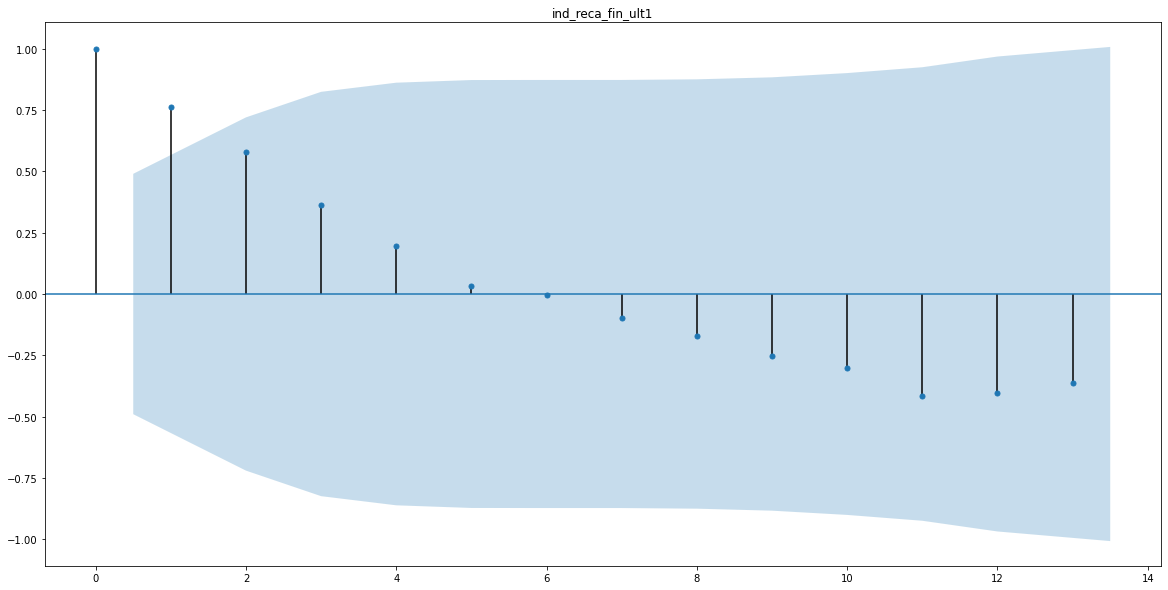

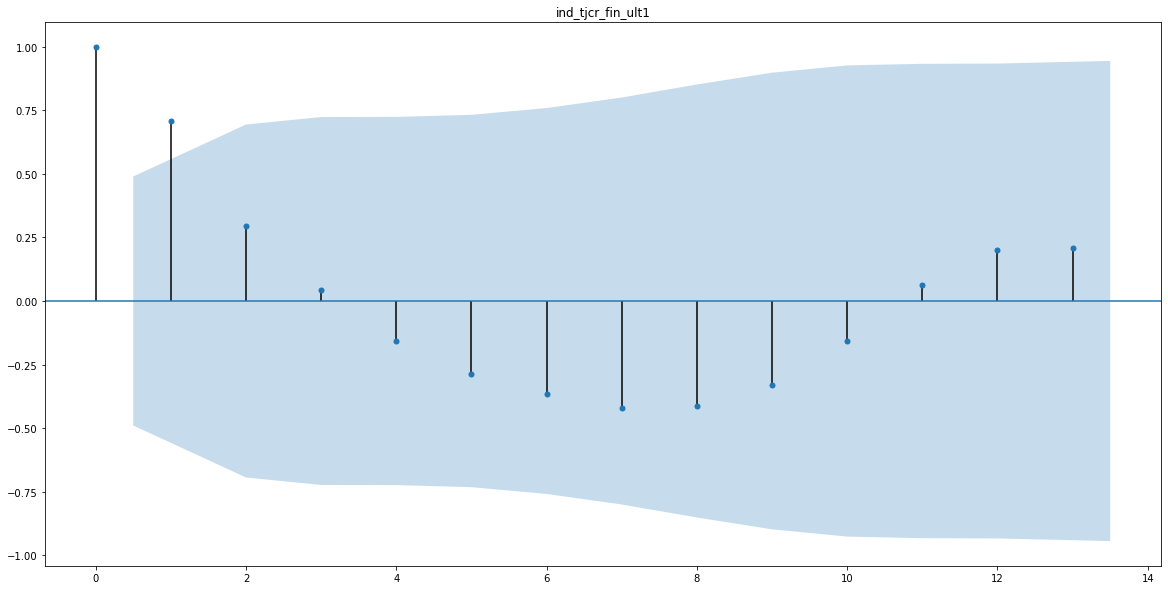

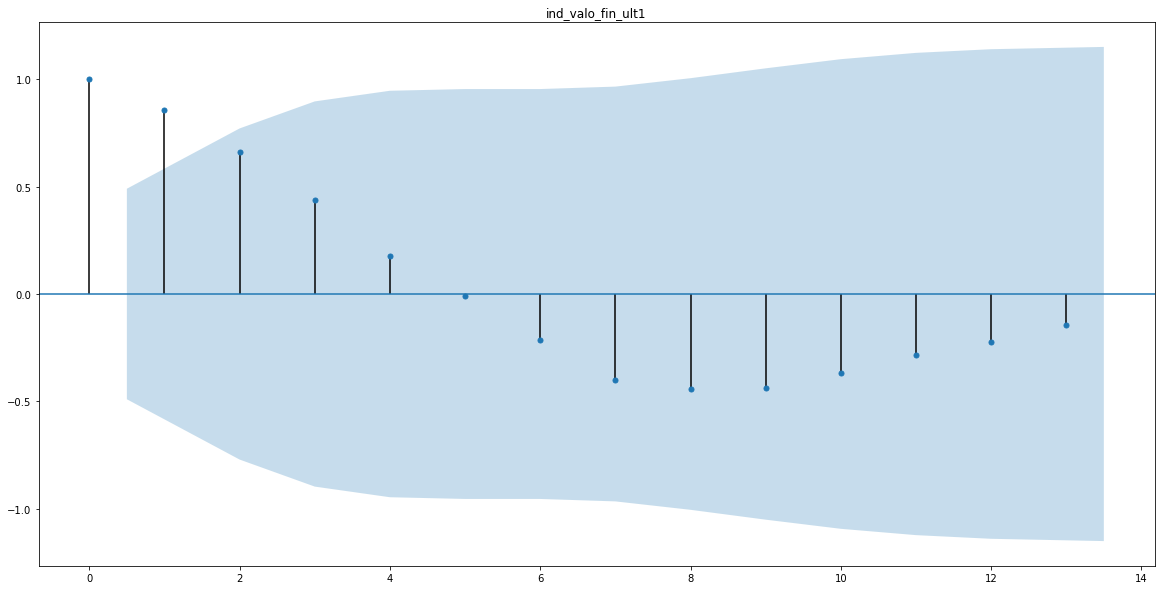

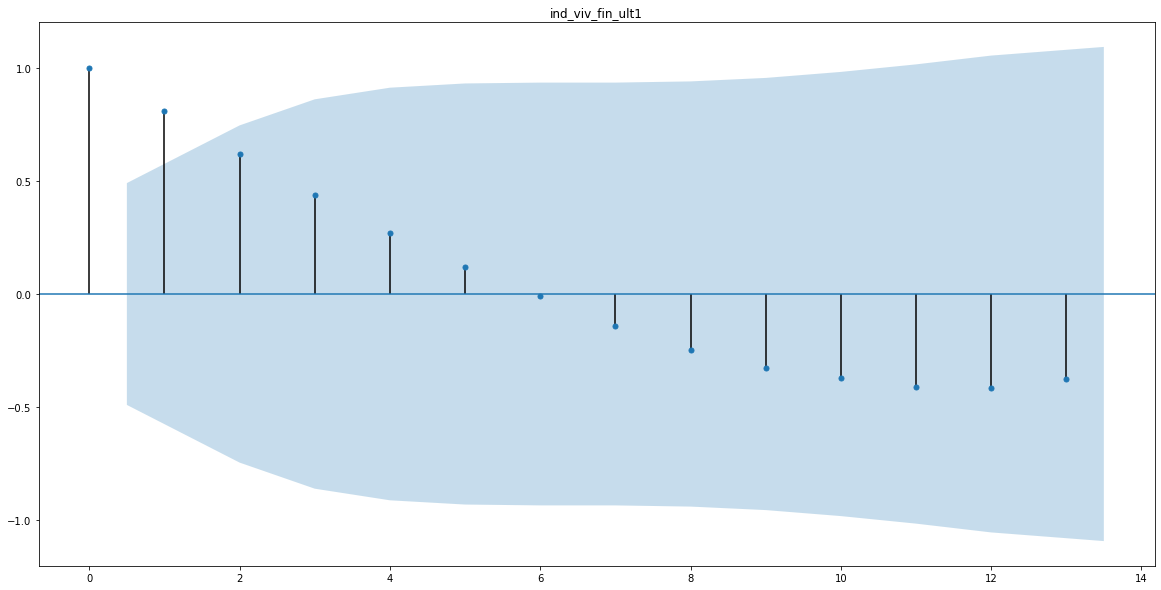

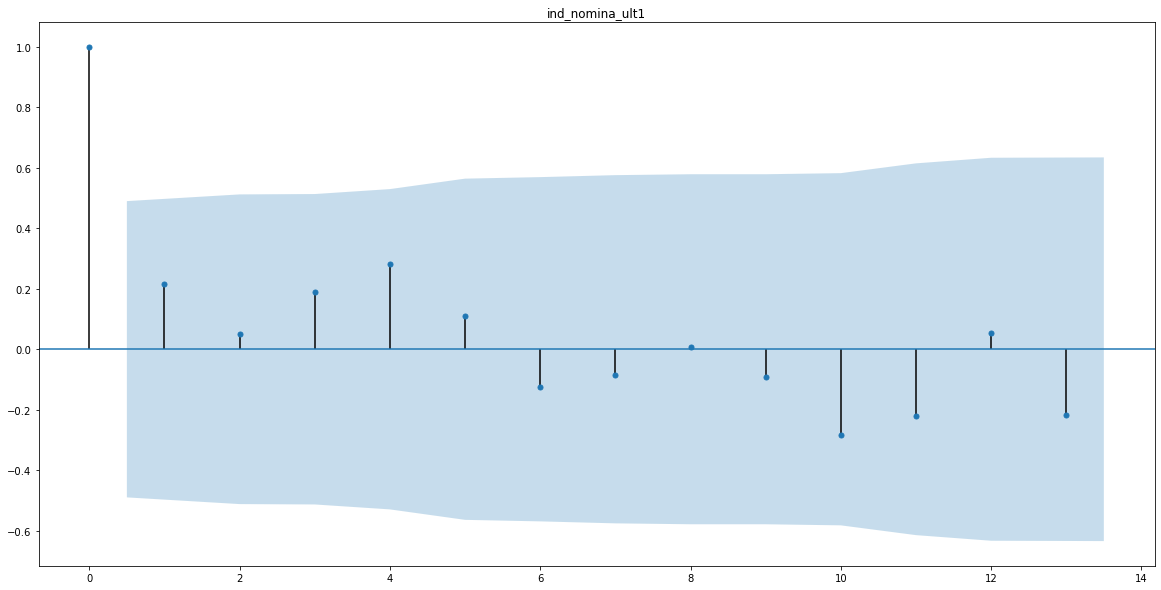

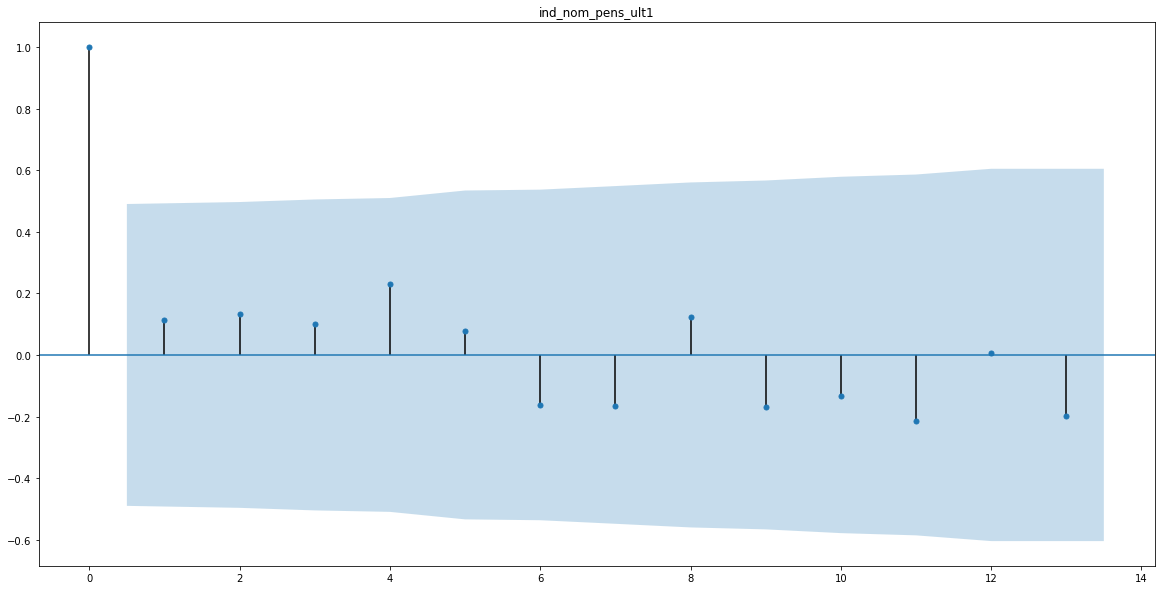

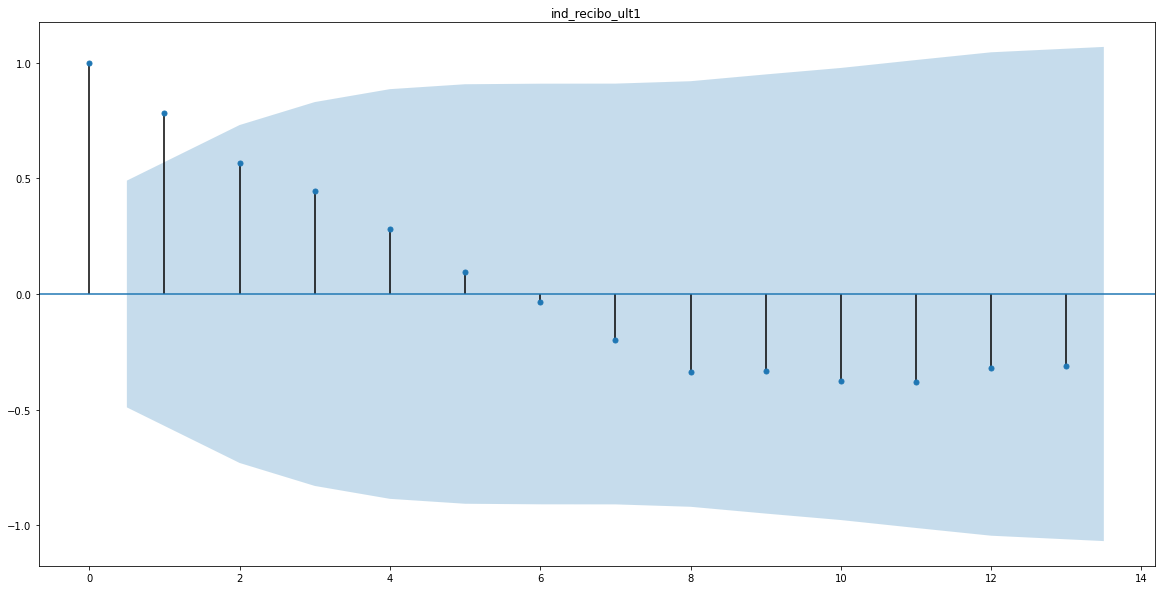

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
for col in final_y.columns:
    plot_acf(data_new[col])
    plt.title(col)
    plt.show()

Autocorrelation Plot: That describes how to create a correlogram of the time series data.

Feature Importance of Lag Variables: That describes how to calculate and review feature importance scores for time series data.

Feature Selection of Lag Variables: That describes how to calculate and review feature selection results for time series data.

So, here we have plotted the importance of lag variables with respect to each products.

In [57]:
for i in range(12,0,-1):
	data_new['t-'+str(i)] = data_new.shift(-i, fill_value = 0).values[:,0]

In [58]:
data_new

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201501,88.0,19.0,487855.0,301.0,58763.0,7757.0,8418.0,106471.0,36195.0,1513.0,1620.0,36010.0,60381.0,13865.0,5007.0,7430.0,2349.0,38288.0,35613.0,20263.0,3234.0,39008.0,43328.0,95601.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0,83.0,85.0,87.0,89.0,89.0
201502,89.0,20.0,488658.0,301.0,60028.0,7690.0,8228.0,106043.0,36040.0,2055.0,1596.0,35621.0,61080.0,14160.0,4998.0,7407.0,2344.0,38507.0,34352.0,20198.0,3219.0,40736.0,44800.0,94543.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0,83.0,85.0,87.0,89.0
201503,89.0,21.0,489074.0,315.0,60929.0,7674.0,7875.0,105688.0,35847.0,2396.0,1560.0,34905.0,61979.0,14545.0,4988.0,7384.0,2340.0,38727.0,34990.0,20020.0,3196.0,42976.0,44096.0,97211.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0,83.0,85.0,87.0
201504,87.0,21.0,489069.0,313.0,62221.0,7653.0,7482.0,105167.0,35650.0,2439.0,1512.0,34909.0,62677.0,14860.0,4968.0,7370.0,2346.0,39603.0,35988.0,19939.0,3173.0,42432.0,46592.0,98312.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0,83.0,85.0
201505,85.0,21.0,489737.0,313.0,63391.0,7647.0,7096.0,104947.0,35499.0,2075.0,1476.0,35107.0,63604.0,15094.0,4797.0,7363.0,2342.0,39946.0,35880.0,19955.0,3155.0,41376.0,42464.0,96487.0,0.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0,83.0
201506,83.0,21.0,494027.0,316.0,59845.0,7596.0,6920.0,104602.0,35342.0,1803.0,1444.0,35085.0,64096.0,15064.0,4721.0,7363.0,2040.0,42888.0,36550.0,19675.0,3138.0,43520.0,47712.0,98655.0,0.0,0.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0,82.0
201507,82.0,19.0,503903.0,320.0,61607.0,7582.0,6939.0,104288.0,35145.0,1845.0,1396.0,34995.0,64479.0,15012.0,4707.0,7345.0,2024.0,41779.0,37159.0,19699.0,3128.0,44928.0,49600.0,99981.0,0.0,0.0,0.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0,82.0
201508,82.0,19.0,514827.0,323.0,62997.0,7556.0,6993.0,104053.0,35010.0,1909.0,1378.0,34942.0,64793.0,15063.0,4693.0,7346.0,2023.0,42021.0,36820.0,19949.0,3108.0,42784.0,47072.0,96045.0,0.0,0.0,0.0,0.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0,81.0
201509,81.0,19.0,529608.0,319.0,63759.0,7521.0,7180.0,103680.0,34795.0,1982.0,1362.0,35076.0,65071.0,15046.0,4682.0,7343.0,2024.0,42267.0,36248.0,20155.0,3090.0,43680.0,48000.0,100726.0,0.0,0.0,0.0,0.0,0.0,77.0,78.0,78.0,78.0,79.0,81.0,81.0


In [59]:
X = data_new.iloc[:, 24: ]
y = data_new.iloc[:, :24]

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs =-1, max_depth=6)
model.fit(X, y)

RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=-1, random_state=1)

In [62]:
print(model.feature_importances_)

[0.02028769 0.02688881 0.04750068 0.04905837 0.05335704 0.06447076
 0.07885686 0.09452985 0.11673545 0.13177642 0.1502953  0.16624277]


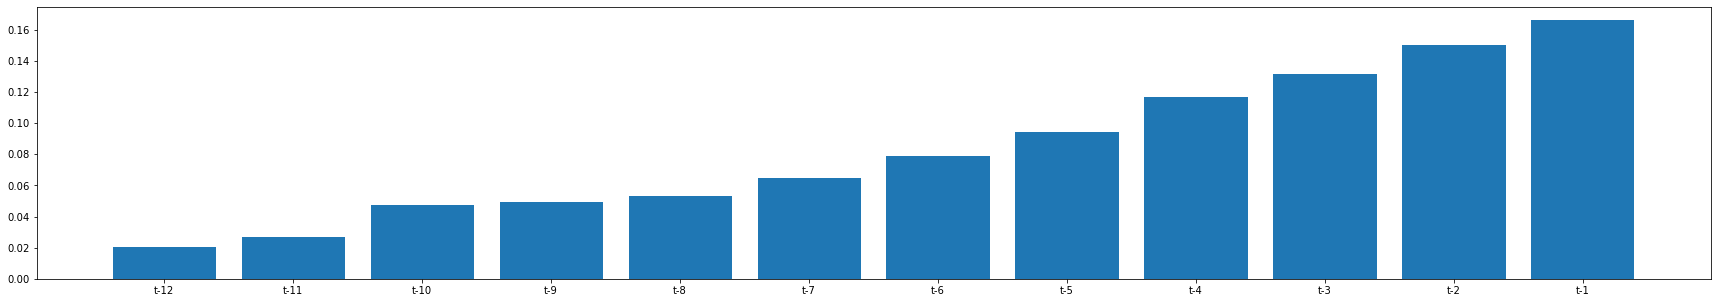

In [63]:
names = X.columns
ticks = [i for i in range(len(names))]
plt.figure(figsize = (30,5))
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

So, from the above plot of feature importance, we can observe that lag1 is most important and the importances of other lags keep on decreasing.